# Face Recognition Project

## Содержание

<div style='border: 3px solid #67a0f549; padding: 20px'>

**1  Face Recognition Project**
    
1.1  Содержание
    
1.2  Постановка задачи
    
1.3  Стандартный пайплайн
    
1.4  Исходные данные
    
**2  Литобзор на тему: "Способы реализации Face Recognition"**
    
**3  Подготовка к обучению модели распознавания лиц**
    
3.1  Импорт библиотек для работы кода
    
3.2  Проверка работоспособности GPU на данном компьютереРабота выполняется локально, поэтому нужно проверить работоспособность драйверов и библиотек для обучения на видеокарте (GPU)
    
3.3  Чтение данных
    
**4  Обучение нейросети для распознавания лиц**
    
4.1  Теоретическая часть
    
4.2  Этап I. Загрузка данных, нормализация изображений, аугментация
    
4.3  Этап II. Загрузка предобученной модели, замена последнего полносвязного слоя, определение оптимизатора, функция потерь
    
4.4  Этап III. Оценка модели
    
4.5  Этап IV. Извлечение эмбеддингов с использованием предварительно обученной модели, визуализация результатов пар изображений с минимальной и максимальной косинусной близостью
    
4.6  Этап V. Анализ косинусной схожести эмбеддингов
    
**5  Реализация метрики: Identificaton rate metric**
    
5.1  Теоретическая часть
    
5.2  Вычисление и анализ метрик: косинусной близости, (TPR) и (FPR), для оценки качества модели
    
**6  Loss - функции (функции потерь)**
    
6.1  TripletLoss
    
6.1.1  Теоретическая часть
    
6.1.2  Трансферное обучение ResNet-50 для триплетной классификации, сравнение Batch All Triplet Loss и Batch Hard Triplet Loss на валидации, вычисление и визуализация метрик TPR и FPR
    
6.2  ArcFace Loss (Additive Angular Margin Loss)
    
6.2.1  Теоретическая часть
    
6.2.2  Обучение модели ResNet-18 с ArcFace Loss для классификации, сравнение с CrossEntropyLoss, вычисление и визуализация TPR и FPR, а также сравнительная визуализация embeddings с t-SNE.
    
**7  Сведение результатов разных методов**
    
**8  Краткий обзор проделанной работы**

## Постановка задачи

Необходимо разработать систему распознавания лиц, чтобы применять ее в офисе. Например, для таких целей:

1) чтобы ваши сотрудники могли сканировать лицо вместо прикладывания id карточек к турникетам при входе;

2) для обеспечения безопасности в офисах

Нужна система, которая может принимать на вход видео, полученное с камер наблюдения, и на выходе выдавать, что за люди были замечены на этом видео.
Система должна уметь работать в случаях, когда лица людей запечатлены крупным или мелким планом, когда они чуть повернуты или наклонены, и когда на одном кадре с камеры находятся несколько лиц людей.


## Стандартный пайплайн

Система распознавания лиц состоит из трех элементов, все три части пайплайна обучаются отдельно:

- детекция лица (face detection);
- выравнивание лица (face alignment);
- распознавания лица (face recognition).

**Первый этап** обработки фото — **детекция лиц** на нем. Для детекции лиц на фото может использоваться модель (например, нейросеть), обученная на задачу детекции лиц людей.

После этапа детекции работа с каждым детектированным лицом идет по отдельности (точнее, с bounding box'ами каждого детектированного лица).

**Второй этап** - **выравнивание лица**. Он состоит из двух этапов:

1. На картинке ищутся ключевые точки лица (обычно это координаты зрачков глаз, кончик носа и точки вокруг рта). Для этой задачи используется отдельная модель (возможно, тоже нейросеть).
2. Повернуть и растянуть изображение так, чтобы точки глаз лица лежали на заданной горизонтальной линии, и чтобы между зрачками глаз было определенное расстояние.

Стадия выравнивания лиц датасета делает задачу распознавания лиц проще для модели на третьей стадии пайплайна.


**Распознавание лиц**


Картинка лица представляется в виде вектора определенного размера, например по косинусному расстоянию, векторы лиц других людей будет иметь другой размер. Т.е. нужно, чтобы нейросеть одного и того же человека определяла по наиболее схожим векторам, а лица незнакомых – как далекие векторы.


**Способы обучения сети для распознавания лиц**

1. Обучение нейросети на обучающей выборке как задачу классификации, где каждый человек – отдельный класс. Лосс-функция – стандартная кросс-энтропия, или ее модификации. После обучения сети, взять предпоследний слой, он и будет вектором итогового лица (на последнем слое определяется класс кому принадлежит лицо).
Недостаток:  если классов в обучающей выборке много, то последний слой сети будет очень широким, это делают сеть сложной для вычислительных мощностей.
2. Обучать сеть на задачу «выдавать похожие эмбеддинги для лиц одного и того же человека, и далекие для лиц разных людей». 


## Исходные данные

 Данные — часть открытого датасета CelebA, который один из стандартных для обучения моделей, связанных с лицами.
 
 В данной работе приняты данные лиц 500 людей CelebA-500. Они уже выровнены. Скачать можно тут: https://disk.yandex.ru/d/S8f03spLIA1wrw Внутри:
  
  - celebA_imgs — папка с выровненными картинками;
  - celebA_anno.txt — файл с аннотацией — каждой картинке из celebA_imgs поставлен в соответствие ее id;
  - celebA_train_split.txt — файл со сплитом на train/val/test.

# Литобзор на тему: "Способы реализации Face Recognition"

<div style='border: 3px solid #67a0f549; padding: 20px'>

**FACE RECOGNITION PIPELINE CLEARLY EXPLAINED**
    
https://medium.com/backprop-labs/face-recognition-pipeline-clearly-explained-f57fc0082750

В статье **FACE RECOGNITION PIPELINE CLEARLY EXPLAINED** рассматривается процесс работы с распознаванием лиц, представленный в виде четырехэтапного конвейера. Автор подробно описывает каждый этап и объясняет его значение в общей схеме распознавания лиц. Первый этап - обнаружение лиц. Здесь используются алгоритмы компьютерного зрения для поиска лиц на изображении. Автор объясняет, как работает алгоритм обнаружения лиц и какие факторы могут влиять на его эффективность. Второй этап - выравнивание лиц. Этот этап направлен на нормализацию изображения лица для последующей обработки. Автор объясняет, почему необходимо выравнивание лиц и какие методы могут быть использованы для достижения этой цели. Третий этап - извлечение признаков. Здесь используются алгоритмы машинного обучения для извлечения характеристик лица, которые затем используются для идентификации и сравнения лиц. Автор раскрывает различные методы извлечения признаков и объясняет их преимущества и недостатки. Четвертый этап - идентификация лиц. На этом этапе используются алгоритмы сравнения и сопоставления лиц для определения, принадлежит ли лицо на изображении конкретному человеку. Автор объясняет различные методы идентификации лиц и приводит примеры их применения. В целом, статья представляет собой наглядное и понятное объяснение процесса распознавания лиц, включая основные этапы и используемые методы. Она может быть полезна для тех, кто интересуется этой темой или хочет получить более глубокое понимание работы систем распознавания лиц. В статье также упоминаются четыре системы глубокого обучения для распознавания лиц: **DeepFace**, серия систем **DeepID, VGGFace и FaceNet**

<div style='border: 3px solid #67a0f549; padding: 20px'>

**КАК РАБОТАЕТ РАСПОЗНАВАНИЕ ЛИЦ И МОЖНО ЛИ ОБМАНУТЬ ЭТУ СИСТЕМУ**
    
https://trends.rbc.ru/trends/industry/6050ac809a794712e5ef39b7

Основные тезисы статьи **КАК РАБОТАЕТ РАСПОЗНАВАНИЕ ЛИЦ И МОЖНО ЛИ ОБМАНУТЬ ЭТУ СИСТЕМУ**

- Распознавание лиц становится массовой технологией, применяемой в различных сферах.

- Системы распознавания лиц используются для идентификации, оплаты, доступа к сервисам и аккаунтам в соцсетях.

- В ближайшие годы распознавание лиц станет еще более распространенным.

- Технологии распознавания лиц могут вызывать опасения относительно нарушения приватности и частной жизни граждан.

- В разных странах существуют различные регламенты и законы, регулирующие использование распознавания лиц.

- Эксперты предсказывают, что в ближайшие годы распознавание лиц станет массовой технологией, полностью изменяющей приватность и частную жизнь.

<div style='border: 3px solid #67a0f549; padding: 20px'>

**FACE LANDMARKS DETECTION WITH PYTORCH**
    
https://towardsdatascience.com/face-landmarks-detection-with-pytorch-4b4852f5e9c4

Основные тезисы статьи **FACE LANDMARKS DETECTION WITH PYTORCH:**

Распознавание лицевых ориентиров с помощью PyTorch - На пути к науке о данных
- Статья обсуждает использование программного обеспечения для определения ключевых точек на лице и проецирования маски.

- В руководстве описывается создание программы с использованием Pytorch и использование официального набора данных DLib.

- Набор данных содержит 6666 изображений различных размеров и координаты 68 ориентиров для каждой грани.

- Для обучения модели необходимо обрезать изображение и передать только часть лица.

- Набор данных преобразуется случайным образом для предотвращения переобучения обучающего набора данных.

- Используется ResNet18 в качестве базовой платформы, и первый и последний слои модифицируются в соответствии с целью.

- Обучение нейронной сети осуществляется с использованием среднеквадратичной ошибки между предсказанными ориентирами и истинными ориентирами.

- Каскадный классификатор Харра OpenCV используется для обнаружения лиц на изображении.

<div style='border: 3px solid #67a0f549; padding: 20px'>

**HOW TO PERFORM FACE DETECTION WITH DEEP LEARNING**

https://machinelearningmastery.com/how-to-perform-face-detection-with-classical-and-deep-learning-methods-in-python-with-keras/

В статье **HOW TO PERFORM FACE DETECTION WITH DEEP LEARNING** рассматривается задача обнаружения лиц на изображениях с использованием классических и глубоких методов машинного обучения в Python с использованием фреймворка Keras. Автор начинает с обзора классических методов, таких как Хаар-каскады и метод Виолы-Джонса. Он объясняет, как эти методы работают и как можно использовать библиотеку OpenCV для их реализации. Затем автор переходит к рассмотрению глубокого обучения и представляет архитектуру сверточной нейронной сети (CNN) для обнаружения лиц. Он объясняет, как работает CNN и как использовать библиотеку Keras для создания и обучения модели. Далее автор приводит примеры кода для обнаружения лиц с использованием как классических, так и глубоких методов. Он демонстрирует, как загрузить и предобработать изображения, как настроить модель и как использовать ее для обнаружения лиц на изображениях. В заключение автор делает выводы о преимуществах и недостатках каждого метода и даёт рекомендации по выбору подходящего метода в зависимости от конкретной задачи. Таким образом, эта статья представляет обзор различных методов обнаружения лиц на изображениях с использованием Python и Keras, с примерами кода и рекомендациями по применению каждого метода.

<div style='border: 3px solid #67a0f549; padding: 20px'>

**FACE RE-IDENTIFICATION CHALLENGE: ARE FACE RECOGNITION MODELS GOOD ENOUGH?**
    
http://www.eecs.qmul.ac.uk/~sgg/papers/ChengEtAl_PR2020.pdf

В статье **FACE RE-IDENTIFICATION CHALLENGE: ARE FACE RECOGNITION MODELS GOOD ENOUGH?**  рассматривается **Face re-identification (Re-ID)**, которая направлена на отслеживание одних и тех же личностей в пространстве и времени с использованием тонкой информации об их идентичности на автоматически обнаруженных изображениях лиц, сделанных неконтролируемыми видами видеонаблюдения. Несмотря на значительные успехи в системах распознавания лиц для контролируемых изображений лиц в социальных медиа, задача **Re-ID** более сложна из-за низкого качества данных с изображениями лиц, полученными с видеокамер наблюдения, и остается малоизученной. Однако решение этой проблемы открывает широкий спектр практических применений, начиная от правоохранительных органов и информационной безопасности до бизнеса, развлечений и электронной коммерции. Для стимулирования дальнейших исследований в области **Re-ID** и поиска практических и надежных решений введен новый масштабный бенчмарк для видеонаблюдения - **SurvFace**. Он характеризуется низким разрешением, движущимся размытием, неконтролируемыми позами, варьирующими окуплениями, плохим освещением и фоновыми помехами. Этот новый бенчмарк является самым крупным и, что более важно, единственным настоящим набором данных для исследования **Re-ID** в условиях видеонаблюдения, где изображения лиц получены и обнаружены в реалистичных сценариях видеонаблюдения. Мы показываем, что текущие передовые методы распознавания лиц удивительно плохи для **Re-ID**. Кроме того, **Re-ID** обычно более сложна в открытом сценарии, как это естественно требуется в ситуациях видеонаблюдения, из-за большого количества неподходящих людей (дистракторов), появляющихся в открытых сценах. Кроме того, исследуется проблема низкого разрешения, присущая изображениям лиц в видеонаблюдении. Наконец, мы обсуждаем открытые проблемы исследований, которые необходимо решить для преодоления малоизученной проблемы **Re-ID**.

<div style='border: 3px solid #67a0f549; padding: 20px'>

**FACE RECOGNITION SYSTEMS: A SURVEY**
    
 https://www.mdpi.com/1424-8220/20/2/342

Статья **FACE RECOGNITION SYSTEMS: A SURVEY** была опубликована в журнале Sensors в 2020 году. В статье авторы рассматривают различные методы распознавания лиц, используемые в системах видеонаблюдения, контроля доступа, идентификации преступников и других областях. Они описывают техники локального, голистического и гибридного подходов, которые используются для создания описания изображения лица, используя только несколько признаков изображения лица или все признаки лица в целом. В статье также приводится сравнение между этими техниками, перечисляются их преимущества и недостатки в терминах устойчивости, точности, сложности и дискриминации. Авторы также предоставляют обзор наиболее часто используемых баз данных, включая те, которые используются для обучения с учителем и без учителя. В статье также приводятся числовые результаты наиболее интересных техник, а также контекст экспериментов и вызовов, с которыми сталкиваются эти техники. Наконец, в статье дается обсуждение будущих направлений в области техник, используемых для распознавания лиц.

<div style='border: 3px solid #67a0f549; padding: 20px'>

**PAST, PRESENT, AND FUTURE OF FACE RECOGNITION: A REVIEW**
    
https://www.mdpi.com/2079-9292/9/8/1188

Статья **PAST, PRESENT, AND FUTURE OF FACE RECOGNITION: A REVIEW** и была опубликована в журнале **Electronics** в 2020 году. В статье авторы рассматривают историю технологии распознавания лиц, текущие методологии и будущие направления. Они сосредоточены на базах данных, методах распознавания лиц 2D и 3D, а также на глубоком обучении, поскольку оно представляет актуальность в этой области. В статье также обсуждаются открытые вопросы и потенциальные направления для исследований в области распознавания лиц.

<div style='border: 3px solid #67a0f549; padding: 20px'>

**FACE RECOGNITION: PAST, PRESENT AND FUTURE (A REVIEW)**
    
https://www.sciencedirect.com/science/article/abs/pii/S1051200420301548

Основные тезисы статьи **FACE RECOGNITION: PAST, PRESENT AND FUTURE (A REVIEW):**

- Статья представляет собой обзор исследования по распознаванию лиц с использованием HOG-EBGM.
- Авторы обсуждают различные методы распознавания лиц и их применение.
- Исследование проводилось с использованием наборов изображений и видео для распознавания лиц.
- Авторы представляют свои научные интересы, связанные с обработкой изображений, нейронными сетями и анализом случайности.
- Исследование было поддержано Советом по научным и технологическим исследованиям Турции.


<div style='border: 3px solid #67a0f549; padding: 20px'>

**DEEP FACE RECOGNITION: A SURVEY**
    
https://www.sciencedirect.com/science/article/abs/pii/S0925231220316945

Основные тезисы статьи **DEEP FACE RECOGNITION: A SURVEY:**

- Статья представляет собой список публикаций и авторов, связанных с распознаванием лиц.
- В статье обсуждаются различные методы и подходы к распознаванию лиц, включая использование глубокого обучения.
- Представлены обзоры литературы и исследований в области распознавания лиц.
- Упоминаются различные наборы данных и задачи распознавания лиц, такие как MegaFace и Ms-Celeb-1M.
- Обсуждаются научные интересы и достижения авторов, связанных с распознаванием образов и компьютерным зрением.

<div style='border: 3px solid #67a0f549; padding: 20px'>

**FACIAL-RECOGNITION ALGORITHMS: A LITERATURE REVIEW**
    
https://journals.sagepub.com/doi/10.1177/0025802419893168

Основные тезисы статьи **FACIAL-RECOGNITION ALGORITHMS: A LITERATURE REVIEW**

- Статья представляет собой обзор методов распознавания лиц в судебной медицине и криминалистике.
- Методы распознавания лиц основаны на знаниях и внешнем виде.
- Обсуждаются различные подходы, включая методы, основанные на знаниях, и методы, основанные на внешнем виде.
- Статья представляет собой обзор литературы и не содержит конкретных результатов исследований или экспериментов.


<div style='border: 3px solid #67a0f549; padding: 20px'>

**A SURVEY OF FACE RECOGNITION TECHNIQUES UNDER OCCLUSION**
    
https://ietresearch.onlinelibrary.wiley.com/doi/full/10.1049/bme2.12029

Основные тезисы статьи **A SURVEY OF FACE RECOGNITION TECHNIQUES UNDER OCCLUSION**

- Окклюзия в распознавании лиц создает трудности, но существуют методы для их преодоления.
- Методы обнаружения закрытых лиц основаны на наблюдении, что частичные перекрытия могут сбить с толку детекторы.
- Предлагается обнаружение закрытых лиц как особая проблема обнаружения объектов одного класса.
- Предлагается состязательное распознавание лиц с учетом окклюзии для одновременного обнаружения закрытых лиц и сегментации области окклюзии.
- Цель состоит в выделении признаков, на которые в меньшей степени влияют окклюзии, сохраняя при этом способность к распознаванию.
- Инженерные функции, основанные на исправлениях, эффективны, но требуют точной регистрации и интеграции решений.
- Функции, основанные на обучении, более гибкие и могут быть эффективными при наличии различных типов окклюзии.

<div style='border: 3px solid #67a0f549; padding: 20px'>

**A REVIEW OF FACE RECOGNITION TECHNOLOGY**
    
https://ieeexplore.ieee.org/abstract/document/9145558

В статье **A REVIEW OF FACE RECOGNITION TECHNOLOGY** рассматривают технологию распознавания лиц. В ней описывают технологию распознавания лиц является биометрической технологией, которая основана на идентификации черт лица человека. Люди собирают изображения лица, а оборудование для распознавания автоматически обрабатывает изображения. Статья также описывает различные методы распознавания лиц, такие как метод главных компонент, метод линейного дискриминанта и метод глубокого обучения.

<div style='border: 3px solid #67a0f549; padding: 20px'>

**THE APPLICATION AND INFLUENCING FACTORS OF COMPUTER VISION: FOCUS ON HUMAN FACE RECOGNITION IN MEDICAL FIELD**
    
https://elibrary.ru/item.asp?id=49392052 

The application and influencing factors of computer vision: focus on human face recognition in medical field / X. Liu, X. Xie, W. Hu, H. Zhou // , 10 сентября 2022 года, 2022. – P. 32-37. – EDN MTBGET.

Применение и влияющие факторы компьютерного зрения: акцент на распознавании лиц в медицине.

АННОТАЦИЯ: Распознавание лиц человека является областью исследований, вызвавшей большой интерес со стороны смежных дисциплин. Из-за его высокой эффективности и точности, он был применен в ярких отраслях промышленности. В этой статье рассматриваются технические особенности, приложения и некоторые распространенные алгоритмы распознавания лиц, а также иллюстрируются их преимущества и недостатки. В данном обзоре основное внимание уделяется применению этой технологии в медицинской сфере, и выдвигаются перспективы ее дальнейшего развития.

<div style='border: 3px solid #67a0f549; padding: 20px'>

**FACIAL RECOGNITION TECHNOLOGY IN SCHOOLS: CRITICAL QUESTIONS AND CONCERNS**
    
https://www.tandfonline.com/doi/full/10.1080/17439884.2020.1686014

Основные тезисы статьи **FACIAL RECOGNITION TECHNOLOGY IN SCHOOLS: CRITICAL QUESTIONS AND CONCERNS:**

- Технологии распознавания лиц становятся все более распространенными в различных сферах общества.
- В школах внедряются системы безопасности с распознаванием лиц, и предпринимаются попытки интегрировать их в платформы обучения.
- Школы считаются благоприятными условиями для внедрения технологий распознавания лиц благодаря их инфраструктурной легкости и существующей базе данных фотографий лиц учащихся.
- Системы распознавания лиц органично вписываются в устоявшуюся культуру школьного наблюдения и мониторинга.
- Однако существуют вопросы и озабоченности, которые ставят под сомнение внедрение технологий распознавания лиц в школах.
- Один из аргументов касается дегуманизирующего характера школьного обучения, ориентированного на лицо.
- Технологии распознавания лиц могут приводить к искажению выражения лица учащихся и дегуманизации.
- Еще одним тревожным недостатком технологий распознавания лиц является их роль в акцентировании внимания на гендере и расовой принадлежности учащихся при принятии школьных решений.

<div style='border: 3px solid #67a0f549; padding: 20px'>

**FACIAL RECOGNITION TECHNOLOGY CAN EXPOSE POLITICAL ORIENTATION FROM NATURALISTIC FACIAL IMAGES**
    
 https://www.nature.com/articles/s41598-020-79310-1

Основные тезисы статьи **FFACIAL RECOGNITION TECHNOLOGY CAN EXPOSE POLITICAL ORIENTATION FROM NATURALISTIC FACIAL IMAGES:**

- Статья исследует связь между внешностью и политическими убеждениями.
- Исследование основано на выборке из 27 023 изображений лиц из Facebook.
- Участники были классифицированы по их политическим убеждениям с использованием алгоритмов распознавания лиц и логистической регрессии.
- Точность классификации выражается в AUC.
- Классификатор волос на лице был создан с использованием дескрипторов лица VGGFace2.
- Наборы данных и код доступны по адресу https://osf.io/c58d3/

# Подготовка к обучению модели распознавания лиц

## Импорт библиотек для работы кода

In [1]:
# стандартные библиотеки
import os
import math
import gc

# библиотеки для работы с массивами данных
import numpy as np
import pandas as pd
from numpy.linalg import norm

# сторонние библиотеки
import cv2
from PIL import Image
from skimage import io, transform
from tqdm import tqdm, tqdm_notebook
from IPython.display import clear_output

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE
from collections import defaultdict

# torch
import torch
from torch import nn
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torchvision import models, transforms
from torch.nn import functional as F
from torch.utils.data import Dataset
from transformers import AdamW


import matplotlib.pyplot as plt
import seaborn as sns

# игнорирование ошибок
import warnings
warnings.filterwarnings('ignore')

# общее формление для графиков
sns.set(style="white", palette="colorblind") # "tab10"

# счетчик времени
import time

# константы в проекте
BATCH_SIZE = 64
LEARNING_RATE = 1e-4
WEIGHT_DECAY = 1e-8

## Проверка работоспособности GPU на данном компьютере

Работа выполняется локально, поэтому нужно проверить работоспособность драйверов и библиотек для обучения на видеокарте (GPU)

In [3]:
# проверка наличия GPU и установка соответствующего режима обучения
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA не работает.  Обучение моделей на процессоре (CPU)')
else:
    print('CUDA работает.  Обучение моделей на видеокарте (GPU)')

CUDA работает.  Обучение моделей на видеокарте (GPU)


In [4]:
# вывод общей информации по графической карте RTX4070ti
!nvidia-smi

Thu Jan 25 13:27:11 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 528.24       Driver Version: 528.24       CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0  On |                  N/A |
|  0%   47C    P8    12W / 285W |    946MiB / 12282MiB |      7%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Чтение данных

Для начала посмотрим что из себя представляют данные лиц части из 500 людей датасета CelebA-500. Насколько хорошо проведено выравнивание лиц на фото 

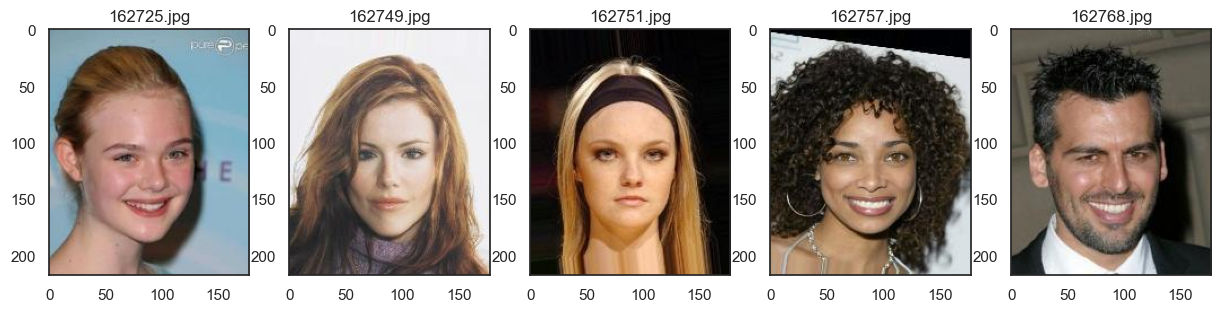

In [5]:
# функция для вывода части изображений датасета CelebA-500
def show_imgs(directory, images_names):
    """
    Функция для вывода части изображений датасета
    
    """
    imgs = [] # загрузка изображений в массив imgs
    for img in images_names:
        img = Image.open(os.path.join(directory, img))
        imgs.append(np.array(img))

    f, axes = plt.subplots(1, len(imgs), figsize=(3 * len(imgs), 5))
    for i, axis in enumerate(axes):
        axes[i].imshow(imgs[i])
        axes[i].set_title(images_names[i])
    plt.show()

directory = 'D:\data\DLS\celebA_train_500\celebA_imgs'
images_names = os.listdir(directory)[-5:]
show_imgs(directory, images_names)

# Обучение нейросети для распознавания лиц

## Теоретическая часть

Третья часть пайплайна — это, собственно, распознавание лиц.

Что такое "распознавание": мы хотим построить такую нейросеть, которая принимает на вход картинку лица, а выдает вектор определенного размера. И мы хотим, чтобы векторы лиц одного и того же человека были близки по некоторому расстоянию (например, косинусному), а векторы лиц разных людей были далеки по этому же расстоянию. Обычно в качестве расстояния используется [косинусное расстояние](https://en.wikipedia.org/wiki/Cosine_similarity) (cosine distance).

Почему мы хотим построить именно такую сеть? Почему не посмтроить обычную сеть для классификации и научить ее классифицировать лица из обучающей выборки, где каждый отдельный человек — это один класс? Ответ такой — мы хотим, чтобы наша модель умела работать с лицами людей, которых нет в обучающей выборке. Хотим, чтобы она на лица одного и того же незнакомого человека выдавала близкие векторы (т.е. "говорила" нам, что это один и тот же человек), а на лица разных людей — далекие векторы.

Пусть тогда у нас есть база данных людей вида (id, набор векторов его лиц). Когда к нам придет новая картинка лица, мы ее прогоним через модель и получим вектор этого лица. Далее сравним этот вектор по метрике расстояния с векторами из нашей базы. Тот id, чьи векторы будут наиболее близки к нашему, и будет ответом на вопрос "кто изображен на картинке"

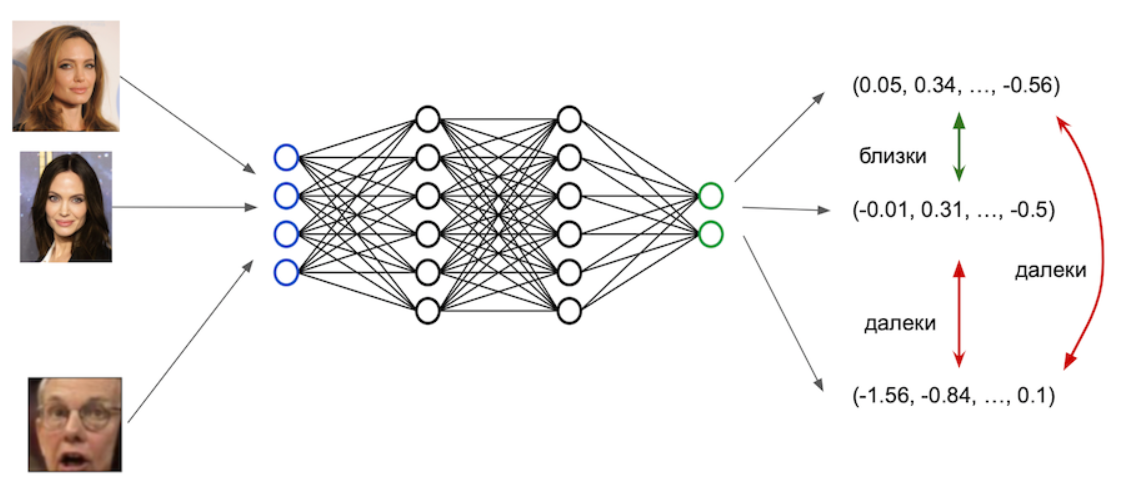

Такую сеть можно обучать разными способами. Два самых распространенных — такие:

1. Можно обучить нейросеть на обучающей выборке лиц на задачу классификации. Каждый отдельный человек — это один класс. В качестве лосс-функции можно использовать стандартную кросс-энтропию или специальные ее модификации (разберем ниже в ноутбуке). Затем, после обучения сети, выкинуть последний слой и считать вектором лица выход предпоследнего слоя сети. Это будет работать: полученные таким образом векторы лиц действительно будут близки для лиц одного и того же человека, и далеки для лиц разных людей. Причем это будет работать даже на тех лицах, которые не было в обучающей выборке (при условии, что обучающая выборка достаточно велика).

    У этого подхода есть недостаток: классов в обучающем датасете может быть очень много. Из-за этого последний слой сети станет очень широким. Это сделает обучение сети вычислительно затратным и сложным по памяти. Иногда приходится этот последний слой делить на несколько разных GPU, настолько он бывает большим.
2.  Можно пойти другим путем: обучать сеть напрямую на задачу "выдавать похожие эмбеддинги для лиц одного и того же человека, и далекие эмбеддинги для лиц разных людей". Это называется **contrastive training**.
    
    На каждой итерации обучения тогда происходит следующее:
    - берется картинка лица, к ней выбирается позитивная пара (еще одна картинка лица того же человека) и негативная (картинка лица другого человека). Все три картинки подаются на вход сети, на выходе получаются три вектора. Далее считается расстояние между векторами 1 и 2 и расстояние между векторами 1 и 3. Нейросеть обучается так, чтобы расстояние между векторами 1 и 2 было как можно меньше, а расстояние между векторами 1 и 3 — как можно больше.

    Лосс-функция в этом случае выглядит так:

 $$L = D(anchor, positive) - D(anchor, negative)$$

У contrastive loss тоже есть недостаток: его достаточно сложно настроить (подобрать к нему гиперпараметры).

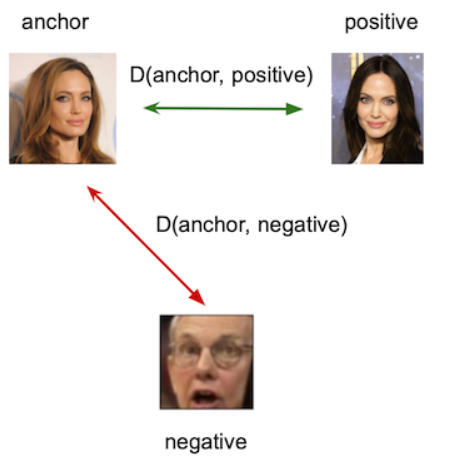

Вот так устроен пайплайн распознавания лиц, который мы хотим получить. Заметим, что все три части пайплайна обучаются отдельно.
- первая часть — это просто задача детекции;
- вторая часть — задача выравнивания фотографии лица;
- третья часть — задача распознавания лица по выровненной фотографии.

## Этап I. Загрузка данных, нормализация изображений, аугментация

Процесс выполнения задачи обучения нейронной сети для распознавания лиц опишем следующими шагами:

**1. Загрузка путей к изображениям:**

Определим функцию get_paths(dataset_type='train'), которая возвращает список путей к изображениям для указанного типа набора данных (тренировочного, валидационного или тестового). Пути к изображениям извлекаются из файла celebA_train_split.txt, ассоциированного с определенным типом набора данных.

**2. Класс Dataset для обработки данных:**

Определим класс celebADataset(Dataset), предназначенный для обработки данных CelebA. В конструкторе класса загружаются пути к изображениям и соответствующие им метки из файла celebA_anno.txt. Эти данные будут использоваться для обучения модели. Также применяются указанные трансформации (нормализация и аугментация) к изображениям.

**3. Нормализация изображений и создание трансформаций:**

Задаются параметры нормализации для изображений и создается объект трансформации с последовательностью операций, таких как изменение размера, обрезка по центру, преобразование в тензор и нормализация.

**4. Аугментация данных:**

Определяется последовательность аугментаций, таких как изменение цвета и горизонтальное отражение. Эти аугментации применяются к изображениям в процессе обучения для улучшения обобщения модели.

**5. Создание объектов Dataset для тренировочного, валидационного и тестового наборов данных:**

Создаются объекты celebADataset для тренировочного, валидационного и тестового наборов данных, используя соответствующие трансформации и аугментацию.

**6. Загрузчики данных:**

Определяются загрузчики данных (train_loader, val_loader, test_loader), которые будут использоваться для итерации по данным в процессе обучения, валидации и тестирования модели.

**7. Функция для отображения изображений:**

Определяется функция imshow, которая позволяет визуализировать тензоры изображений, приведенных к изображениям в формате NumPy, с учетом нормализации.
Визуализация случайных изображений из тренировочного набора данных:

С помощью matplotlib отображаются случайные изображения из тренировочного набора данных для визуальной проверки данных перед обучением.

**8. Определение количества классов в тренировочном наборе данных:**

Определяется количество уникальных классов в тренировочном наборе данных (n_classes), которое будет использоваться при определении выходного слоя нейронной сети.

<div style='border: 3px solid #67a0f549; padding: 20px'>

**1. Загрузка путей к изображениям**

In [6]:
# загрузка путей к изображениям для тренировочного, валидационного и тестового наборов
def get_paths(dataset_type = 'train'):
    '''
    функция возвращает список путей к изображениям для указанного типа набора данных.
    
    Параметры:
    - dataset_type: одно из 'train', 'val', 'test'
    '''

    labels_dict = {
        'train': 0,
        'val': 1,
        'test': 2,
    }

    with open('D:\data\DLS\celebA_train_500\celebA_train_split.txt', 'r') as f:
        lines = f.readlines()

    lines = [x.strip().split() for x in lines]
    lines = [x[0] for x in lines if int(x[1]) == labels_dict[dataset_type]]

    images_paths = [os.path.join('D:\data\DLS\celebA_train_500\celebA_imgs', filename) for filename in lines]

    return np.array(images_paths)

<div style='border: 3px solid #67a0f549; padding: 20px'>

**2. Класс Dataset для обработки данных**

In [7]:
class celebADataset(Dataset):
    """
    Класс Dataset для набора данных CelebA
    
    """
    
    def __init__(self, dataset_type, transform, aug = None):
        self.images = get_paths(dataset_type = dataset_type)

        with open('D:\data\DLS\celebA_train_500\celebA_anno.txt', 'r') as f:
            labels = f.readlines()

        labels = [x.strip().split() for x in labels]
        labels = {x: y for x, y in labels}
        self.labels = [int(labels[x.split('\\')[-1]]) for x in self.images]

        self.transform = transform
        self.aug = aug

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_name = self.images[idx]
        label = self.labels[idx]

        image = Image.open(img_name)
        if self.aug:
            image = self.aug(image)

        sample = {
            'image': image,
            'label': label,
        }

        sample['image'] = self.transform(sample['image'])

        return sample['image'], sample['label']

<div style='border: 3px solid #67a0f549; padding: 20px'>

**3. Нормализация изображений и создание трансформаций**

In [8]:
# нормализация изображений и создание трансформаций
normalize = [((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)), ((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]

transform  = transforms.Compose([
      transforms.Resize(280),
      transforms.CenterCrop(224),
      transforms.ToTensor(),
      transforms.Normalize(*normalize[0]),
])

<div style='border: 3px solid #67a0f549; padding: 20px'>

**4. Аугментация данных:**

In [9]:
aug = transforms.Compose([
    transforms.ColorJitter(),
    transforms.RandomHorizontalFlip()
])

<div style='border: 3px solid #67a0f549; padding: 20px'>

**5. Создание объектов Dataset для тренировочного, валидационного и тестового наборов данных**

In [10]:
# создание объектов Dataset для тренировочного, валидационного и тестового наборов данных
train_data = celebADataset('train', transform, aug)
val_data = celebADataset('val', transform)
test_data = celebADataset('test', transform)

<div style='border: 3px solid #67a0f549; padding: 20px'>

**6. Загрузчики данных**

In [11]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size = BATCH_SIZE, shuffle = True)
val_loader = torch.utils.data.DataLoader(val_data, batch_size = BATCH_SIZE, shuffle = False)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = BATCH_SIZE, shuffle = False)

<div style='border: 3px solid #67a0f549; padding: 20px'>

**7. Функция для отображения изображений**

In [12]:
# функция для отображения изображений из DataLoader
def imshow(inp, norm, title = None, plt_ax = plt, default = False):
    """
    Отображение тензоров
    
    """
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([*norm[0]])
    std = np.array([*norm[-1]])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt_ax.imshow(inp)

    try:
        if title is not None:
            plt_ax.set_title(title)
    except:
        plt.title(title)
    plt_ax.grid(False)

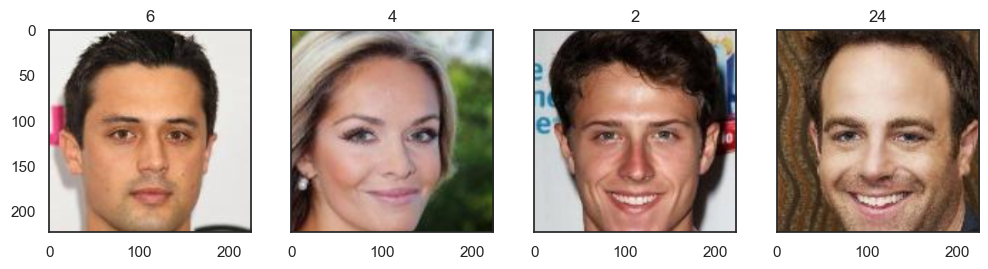

In [13]:
# визуализация случайных изображений из тренировочного набора данных
fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (12, 5), sharey = True, sharex = True)
for fig_x in ax.flatten():
    random_characters = int(np.random.uniform(0, 500))
    im_train, label = train_data[random_characters]
    imshow(im_train, normalize[0], title = label, plt_ax = fig_x)

<div style='border: 3px solid #67a0f549; padding: 20px'>

**8. Определение количества классов в тренировочном наборе данных**

In [14]:
# количество классов в тренировочном наборе данных
n_classes = len(np.unique(train_data.labels))
n_classes

500

## Этап II. Загрузка предобученной модели, замена последнего полносвязного слоя, определение оптимизатора, функция потерь

Обучим модель на тренировочных данных, используя валидационные данные для проверки. Будем использовать стандартную функцию потерь кросс-энтропии (CE loss). После обучения рассчитаем потери (**loss**) и точность (**accuracy**) на тестовом наборе данных.

В этом разделе нужно достичь точности на тестовом наборе данных **не менее 70%**.

Выполним обучение нейронной сети на основе архитектуры ResNet50 для решения задачи классификации изображений. Выполнив следующие шаги:

**1. Определение устройства (CPU или GPU)**

Определяется устройство (device), на котором будет выполняться обучение. Если доступен GPU, то модель будет перемещена на GPU, иначе будет использоваться CPU.

**2. Загрузка предварительно обученной модели ResNet50**

Загружается предварительно обученная модель ResNet50 с помощью models.resnet50(pretrained=True).

**3. Разморозка параметров модели для обучения**

Параметры модели размораживаются, что позволяет им обновляться в процессе обучения. Это выполняется с помощью цикла for param in resnet.parameters(): param.requires_grad_(True).

**4. Замена последнего полносвязного слоя (fc)**

Последний полносвязный слой (fc) заменяется новым слоем, адаптированным к количеству классов в задаче. В данном случае, заменяется на слой с активацией ReLU и двумя линейными слоями, который соответствует количеству классов (n_classes).

**5. Перенос модели на устройство (GPU или CPU)**

Модель переносится на устройство, которое было определено в первом шаге, с использованием метода to(device).

**6. Определение оптимизатора, расписания обучения и функции потерь**

Определяются оптимизатор (AdamW), расписание обучения (ReduceLROnPlateau) и функция потерь (CrossEntropyLoss). Также создается словарь loaders с тренировочным и валидационным загрузчиками данных.

**7. Описание и вызов функции для отображения результатов обучения**

Определяется функция show_result, которая будет использоваться для визуализации результатов обучения, включая графики потерь и точности.

**8. Функция для обучения модели**

Определяется функция train, которая выполняет обучение модели. Внутри функции происходит цикл по эпохам и загрузчикам данных. Модель обучается на тренировочных данных, вычисляется и обновляется функция потерь, и производится оценка точности. Результаты обучения визуализируются с использованием функции show_result. Лучшие веса модели сохраняются, если точность на валидационных данных улучшается.
Вызов функции обучения:

Вызывается функция train с параметрами, определенными выше. Обучение продлится указанное количество эпох (epochs), и результаты обучения будут визуализированы.

Таким образом, весь код представляет собой процесс подготовки, обучения и визуализации результатов обучения нейронной сети на базе ResNet50 для классификации изображений.

<div style='border: 3px solid #67a0f549; padding: 20px'>
    
**1. Определение устройства (CPU или GPU)**

In [15]:
# определение устройства (CPU или GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

<div style='border: 3px solid #67a0f549; padding: 20px'>
    
**2. Загрузка предварительно обученной модели ResNet50**

In [16]:
# загрузка предварительно обученной модели ResNet50
resnet = models.resnet50(pretrained = True)

<div style='border: 3px solid #67a0f549; padding: 20px'>

**3. Разморозка параметров модели для обучения**

In [17]:
# разморозка параметров модели для обучения
for param in resnet.parameters():
    param.requires_grad_(True)

<div style='border: 3px solid #67a0f549; padding: 20px'>
 
**4. Замена последнего полносвязного слоя (fc)**

In [18]:
# замена последнего полносвязного слоя (fc) для адаптации к количеству классов
resnet.fc = nn.Sequential(
    nn.Linear(resnet.fc.in_features, n_classes),
    nn.BatchNorm1d(n_classes),
    nn.ReLU(inplace = True),
    nn.Linear(n_classes, n_classes))

<div style='border: 3px solid #67a0f549; padding: 20px'>
 
**5. Перенос модели на устройство (GPU или CPU)**

In [19]:
# перенос модели на устройство (GPU или CPU)
model = resnet.to(device)

<div style='border: 3px solid #67a0f549; padding: 20px'>
 
**6. Определение оптимизатора, расписания обучения и функции потерь**

In [20]:
# определение оптимизатора, расписания обучения и функции потерь
optimizer = AdamW(model.parameters(), lr = LEARNING_RATE, weight_decay = WEIGHT_DECAY, betas = (0.95, 0.999))
scheduler = ReduceLROnPlateau(optimizer, 'min', patience = 24)
criterion = nn.CrossEntropyLoss() 
loaders = {'train': train_loader, 'valid': val_loader}

<div style='border: 3px solid #67a0f549; padding: 20px'>
 
**7. Функция для отображения результатов обучения**

In [21]:
# функция для отображения результатов обучения
def show_result(data, best_score):
    """
    Отображение результатов обучения
    
    """
    plt.figure(figsize = (12, 3))
        
    plt.subplot(1, 2, 1)
    sns.lineplot(data = data, x = 'epoch', y = 'train_loss', label = 'train_loss')
    sns.lineplot(data = data, x = 'epoch', y = 'valid_loss', label = 'valid_loss')
    plt.ylabel('loss')
    plt.legend()
    plt.title('Loss values - значения функции потерь')
    plt.grid(True)
    plt.minorticks_on()
    plt.grid(which = 'major', linestyle = '-', linewidth = '0.5', color = 'black')
    plt.grid(which = 'minor', linestyle = ':', linewidth = '0.5', color = 'grey')

    plt.subplot(1, 2, 2)
    sns.lineplot(data = data, x = 'epoch', y = 'train_accuracy', label = 'train_accuracy')
    sns.lineplot(data = data, x = 'epoch', y = 'valid_accuracy', label = 'valid_accuracy')
    plt.ylabel('score')
    plt.legend()
    plt.title('Score: accuracy - точность модели')
    plt.grid(True)
    plt.minorticks_on()
    plt.grid(which = 'major', linestyle = '-', linewidth = '0.5', color = 'black')
    plt.grid(which = 'minor', linestyle = ':', linewidth = '0.5', color = 'grey')
            
    plt.show()

<div style='border: 3px solid #67a0f549; padding: 20px'>
 
**8. Функция для обучения модели**

In [22]:
# функция для обучения модели
def train(model, optimizer, scheduler, loss_fn, epochs, loaders, file_name, mode_fc = None):
    """
    Обучение модели
    
    """
    best_score = 0
    for epoch in range(epochs):
        result['epoch'].append(epoch + 1)
        for mode, dataloader in tqdm(loaders.items()):
            running_loss, running_corrects, processed_data, valid_loss = 0, 0, 0, 0

            for X_batch, Y_batch in dataloader:
                X_batch = X_batch.to(device)
                Y_batch = Y_batch.to(device, dtype=torch.long)

                if mode == 'train':
                    model.train()
                    optimizer.zero_grad() 
                    if mode_fc == 'yes':
                        Y_pred = model(X_batch, Y_batch)    
                    else: 
                        Y_pred = model(X_batch)
                else: 
                    model.eval()  
                    with torch.no_grad(): 
                        if mode_fc == 'yes':
                            Y_pred = model(X_batch, Y_batch) 
                        else: 
                            Y_pred = model(X_batch)

                loss = loss_fn(Y_pred, Y_batch)
                preds = torch.argmax(Y_pred, 1)
                running_loss += loss.item() * X_batch.size(0)
                running_corrects += torch.sum(preds == Y_batch.data)
                processed_data += X_batch.size(0)

                if mode == 'train':
                    loss.backward()
                    optimizer.step()

            loss_score = running_loss / processed_data
            accuracy = running_corrects.cpu().numpy() / processed_data
            result[str(mode) + '_loss'].append(loss_score)
            result[str(mode) + '_accuracy'].append(accuracy)

            if mode == 'valid':
                if accuracy > best_score:
                    best_score = accuracy
                    torch.save(model.state_dict(), f'saved_weights_{file_name}.pt')   
                valid_loss = loss_score
            lr = optimizer.param_groups[0]['lr']
            scheduler.step(valid_loss)

        clear_output(wait = True)
        print(f'epoch training: {epoch+1}, lr optimizer: {lr}, loss value validate: {valid_loss: 10.4f}, accuracy validate: {accuracy: 10.4f}')
        print("=" * 120)
        show_result(result, best_score)

### Запуск обучения (epochs = 30)

<div style='border: 3px solid #67a0f549; padding: 20px'>
 
**Обучения модели, вывод результатов**

epoch training: 30, lr optimizer: 1.0000000000000002e-06, loss value validate:     1.3463, accuracy validate:     0.8024


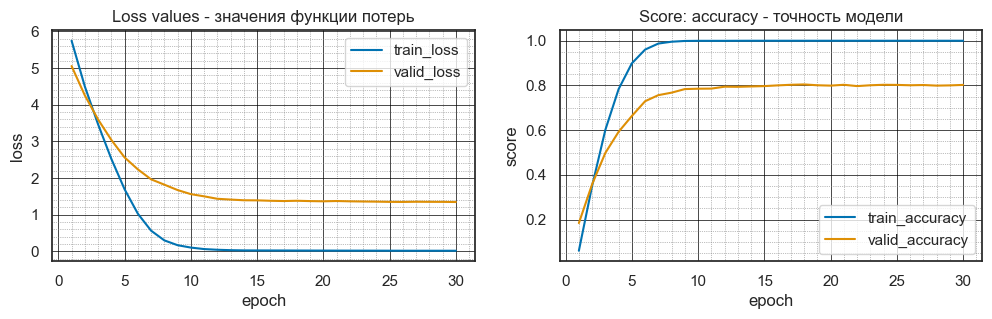

CPU times: total: 1h 17min 41s
Wall time: 20min 47s


In [23]:
%%time

# словарь для хранения результатов
result = {'epoch': [], 'train_loss': [], 'valid_loss': [], 'train_accuracy': [], 'valid_accuracy': []}

# количество эпох обучения
epochs = 30

# Обучение модели
train(model, optimizer, scheduler, criterion, epochs, loaders, 'resnet50_sm')

### Подытог

<div style='border: 3px solid #1f69b4; padding: 20px'>

Результаты обучения стандартной предобученной модели
- модель: train(model, optimizer, scheduler, criterion, epochs, loaders, 'resnet50_sm')
- epoch training: 30, lr optimizer: 1e-06, loss value validate:     1.3463, accuracy validate:     0.8024

Точность модели на валидации растет примерно до 11-12 эпохи достигая значения 0.8 после чего перестает расти.
    
Фунция потерь также перестает падать после 11-12 эпохи достигая значения 1.4 на валидации

## Этап III. Оценка модели

Далее выполним оценку модели на тестовом наборе данных и получим эмбеддинги изображений для этого набора данных следущими шагами:

**1. Оценка модели на тестовом наборе данных**

Сначала определены две функции: evaluate и get_embeddings. Функция evaluate предназначена для оценки модели на указанном наборе данных. Внутри функции происходит итерация по тестовому загрузчику данных (test_loader), модель оценивается на этих данных, вычисляются потери и точность. Результаты оценки (потери и точность) выводятся на экран.

**2. Получение эмбеддингов для тестового набора данных**

Вторая функция, get_embeddings, предназначена для получения эмбеддингов изображений из тестового набора данных. Внутри функции происходит итерация по тестовому загрузчику данных (test_loader), модель оценивается на этих данных, и получаются эмбеддинги. Эмбеддинги нормализуются и добавляются в соответствующие списки. Результатом работы функции являются списки меток классов и соответствующих эмбеддингов.

После определения функций происходит вызов функции evaluate для оценки модели на тестовом наборе данных (test_loader). Результаты (потери и точность) выводятся на экран с использованием функции print. Затем вызывается функция get_embeddings для получения эмбеддингов изображений из тестового набора данных. Метки классов и эмбеддинги сохраняются в переменные labels_list_sm и emb_list_sm.

Создается DataFrame df_default на основе данных из переменной result, который представляет собой результаты обучения модели. DataFrame включает в себя информацию о номере эпохи и точности на валидационном наборе данных. Созданный DataFrame выводится на экран.

<div style='border: 3px solid #67a0f549; padding: 20px'>

**1. Функция для оценки модели на тестовом наборе данных**

In [24]:
def evaluate(model, dataloader, loss_fn, mode_fc = None):
    """
    Функция для оценки модели на наборе данных
    
    """
    losses = []
    running_corrects = 0
    processed_data = 0 

    for X_batch, Y_batch in dataloader:
        X_batch = X_batch.to(device)
        Y_batch = Y_batch.to(device, dtype=torch.long)

        with torch.no_grad():
            model.eval()
            if mode_fc == 'yes':
                Y_pred = model(X_batch, Y_batch)
            else: 
                Y_pred = model(X_batch)

            loss = loss_fn(Y_pred, Y_batch)
            losses.append(loss.item())

            preds = torch.argmax(Y_pred, 1)
            running_corrects += torch.sum(preds == Y_batch.data)
            processed_data += X_batch.size(0)

    accuracy = running_corrects.cpu().numpy() / processed_data
    
    return accuracy, np.mean(losses)

<div style='border: 3px solid #67a0f549; padding: 20px'>

**2. Получение эмбеддингов для тестового набора данных.  Вывод результатов оценки**

In [25]:
def get_embeddings(model, loader, fc = None):
    """
    Функция для получения эмбеддингов изображений
    
    """
    modules = list(model.children())[:-1]
    models_emb = nn.Sequential(*modules)
    labels_list, emb_list = [], []

    for X_batch, Y_batch in loader:
        X_batch, Y_batch = X_batch.to(device), Y_batch.to(device, dtype=torch.long)
        with torch.no_grad():
            models_emb.eval()
            emb = models_emb(X_batch)
            emb = emb / emb.norm(p=2, dim=1)[:, None]

            if fc is None:
                emb_list.extend(emb.view(X_batch.size()[0], -1).cpu().detach().numpy())
            else:
                emb_list.extend(emb.cpu().detach().numpy())
            
            labels_list.extend(Y_batch.cpu().numpy())

    return np.array(labels_list), np.array(emb_list)

In [26]:
# оценка модели на тестовом наборе данных
test_accuracy, test_loss = evaluate(model, test_loader, criterion)
print(f'test loss:{test_loss: 10.4f}, test accuracy:{test_accuracy: 10.4f}')

test loss:    1.3540, test accuracy:    0.7948


In [27]:
# получение эмбеддингов для тестового набора данных
labels_list_sm, emb_list_sm = get_embeddings(model, test_loader)

# создание DataFrame с результатами обучения
df_default = pd.DataFrame(result)[['epoch', 'valid_accuracy']]

### Подытог

<div style='border: 3px solid #1f69b4; padding: 20px'>
    
С применением предобученной модели Resnet50 значения точности нашей модели составляет 0.7948, что является выше порогового значения по условиям задачи равного 0.7.

## Этап IV.  Извлечение эмбеддингов с использованием предварительно обученной модели, визуализация результатов пар изображений с минимальной и максимальной косинусной близостью

Выполним анализ эмбеддингов изображений, полученных из предобученной модели ResNet50 на тестовом и тренировочном наборах данных. Основные этапы кода:

**1. Определение количества значений в выборке. Получение последнего слоя модели.  Создание словаря для хранения данных. Итерация по изображениям в DataLoader'ах**

Задается переменная n_images для определения количества изображений, которые будут использоваться в дальнейшем анализе.
Далее создается последовательность (nn.Sequential) из всех слоев модели, кроме последнего. Это позволяет получить модель, которая выдает эмбеддинги изображений без последнего полносвязного слоя. После этого инициализируется словарь embeddings, который будет использоваться для хранения изображений, их эмбеддингов и соответствующих меток классов для тренировочного и тестового наборов данных.
Итерация по изображениям в DataLoader'ах: создаются DataLoader'ы для тренировочного и тестового наборов данных с размером батча 1 (чтобы итерироваться по изображениям пошагово). Для каждого набора данных происходит итерация по изображениям. Для каждого изображения вычисляются эмбеддинги и сохраняются в словаре embeddings. Итерации продолжаются до достижения заданного количества изображений (n_images).

**2. Визуализация случайных изображений и их косинусной схожести**

Выбираются два случайных индекса изображений (один из тренировочного, другой из тестового набора данных). Для выбранных изображений визуализируются и выводится косинусная схожесть между их эмбеддингами.

Далее выбирается случайный персонаж, и находятся индексы его изображений в тренировочном и тестовом наборах данных. Парные изображения для этого персонажа визуализируются, и выводится косинусная схожесть между их эмбеддингами.

**3. Нахождение и визуализация пар с минимальной и максимальной косинусной близостью**

Итерируясь по изображениям не выбранного ранее персонажа в тренировочном наборе данных, находятся пары с минимальной и максимальной косинусной близостью с изображением выбранного персонажа из тестового набора.

Далее визуализируются изображения с минимальной и максимальной косинусной близостью относительно выбранного ранее персонажа из тестового набора данных.

<div style='border: 3px solid #67a0f549; padding: 20px'>
    
**1. Определение количества значений в выборке. Получение последнего слоя модели.  Создание словаря для хранения данных. Итерация по изображениям в DataLoader'ах**

In [28]:
# количество значений выборки
n_images = 1000

# получение последнего слоя модели
modules = list(model.children())[:-1] 
models_emb = nn.Sequential(*modules)

# словарь для хранения изображений, эмбеддингов и меток
embeddings = {
    'train_images': [],
    'train_emb_images': [],
    'train_labels': [],
    'test_images': [],
    'test_emb_images': [],
    'test_labels': []
}

# DataLoader'ы для пошаговой загрузки изображений
train_loader_one_image = torch.utils.data.DataLoader(train_data, batch_size = 1, shuffle = True)
test_loader_one_image = torch.utils.data.DataLoader(test_data, batch_size = 1, shuffle = False)

loaders = {'train': train_loader_one_image, 'test': test_loader_one_image}

In [29]:
for mode, loader in loaders.items():
    len_cumulative = 0
    for X_batch, Y_batch in loader:
        if len_cumulative < n_images:
            with torch.no_grad():
                models_emb.eval()
                emb = models_emb(X_batch.to(device)).flatten().cpu().numpy()
            
            embeddings[str(mode) + '_images'].append(X_batch)
            embeddings[str(mode) + '_emb_images'].append(emb)
            embeddings[str(mode) + '_labels'].append(Y_batch.numpy())

        len_cumulative += len(X_batch)

<div style='border: 3px solid #67a0f549; padding: 20px'>
    
**2. Визуализация случайных изображений и их косинусной схожести**

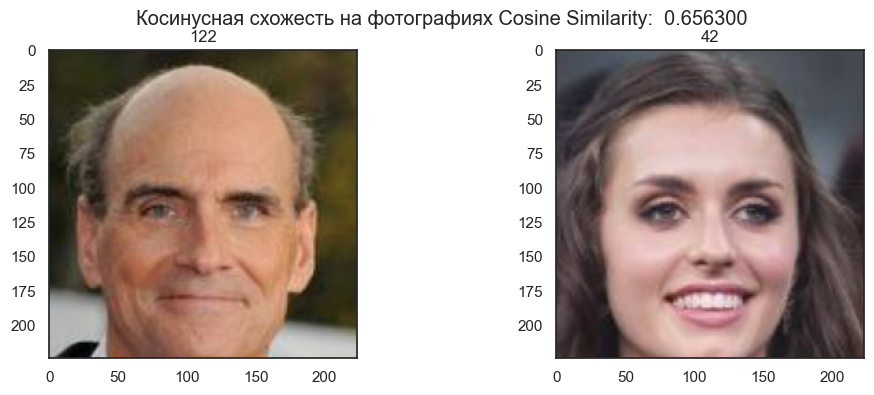

In [30]:
# визуализация случайных изображений
random = np.random.randint(0, n_images, 2)

plt.figure(figsize = (12, 4))

plt.subplot(1, 2, 1)
imshow(embeddings['train_images'][random[0]][0], normalize[0], title = embeddings['train_labels'][random[0]][0])
plt.subplot(1, 2, 2)
imshow(embeddings['test_images'][random[1]][0], normalize[0], title = embeddings['test_labels'][random[1]][0])

train_emb, test_emb = embeddings['train_emb_images'][random[0]], embeddings['test_emb_images'][random[1]]
cosine = np.dot(train_emb, test_emb) / (norm(train_emb) * norm(test_emb))

plt.suptitle(f'Косинусная схожесть на фотографиях Cosine Similarity:  %f' % (cosine))
plt.show()

<div style='border: 3px solid #67a0f549; padding: 20px'>
   
**3. Нахождение и визуализация пар с минимальной и максимальной косинусной близостью**

In [31]:
# выбор случайного персонажа и визуализация его изображений
index_test = []
while len(index_test) == 0:
    random_character = np.random.randint(0, n_images, 1)[0]

    index_train = np.where(embeddings['train_labels'] == random_character)[0]
    index_test = np.where(embeddings['test_labels'] == random_character)[0]

    index_not_this_character = np.where(embeddings['train_labels'] != random_character)[0]

print(len(index_train), len(index_test))

2 4


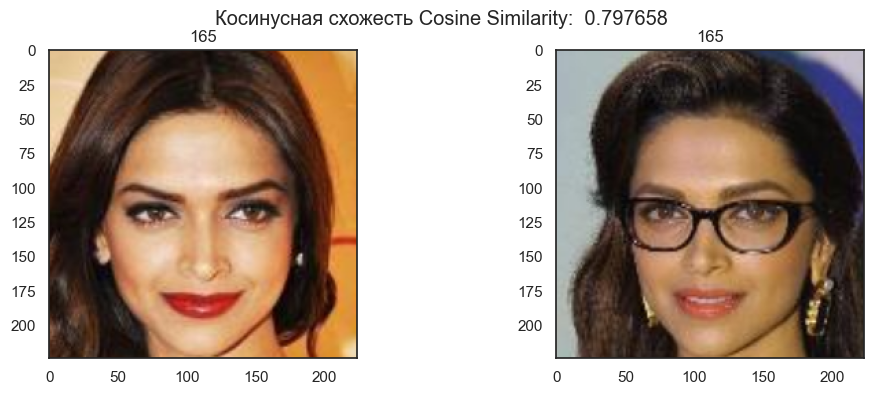

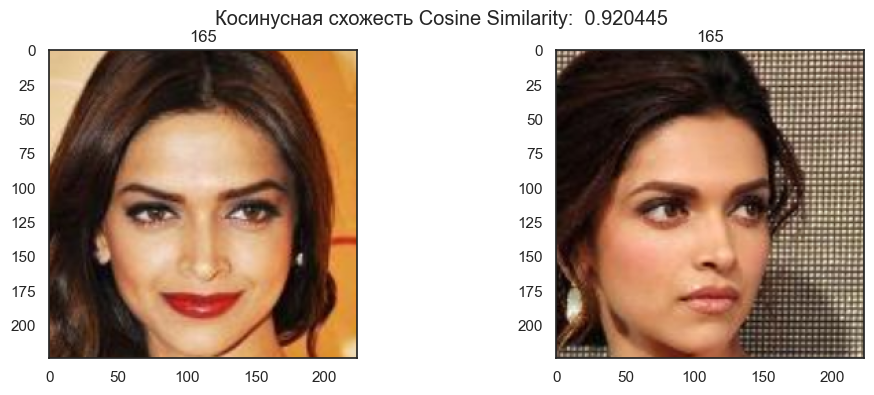

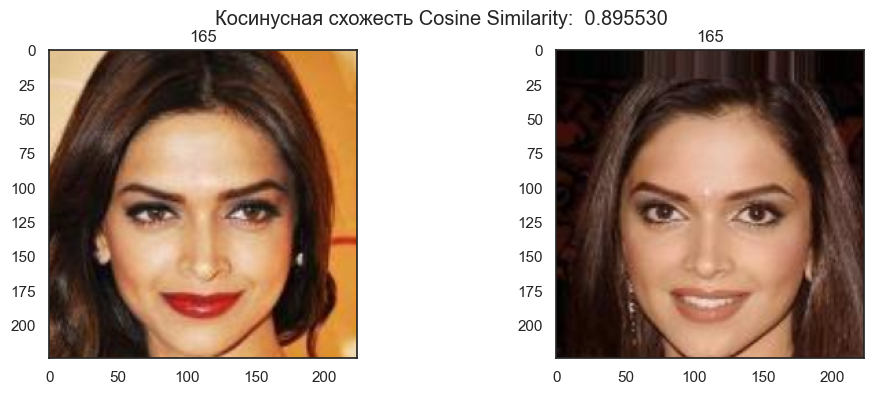

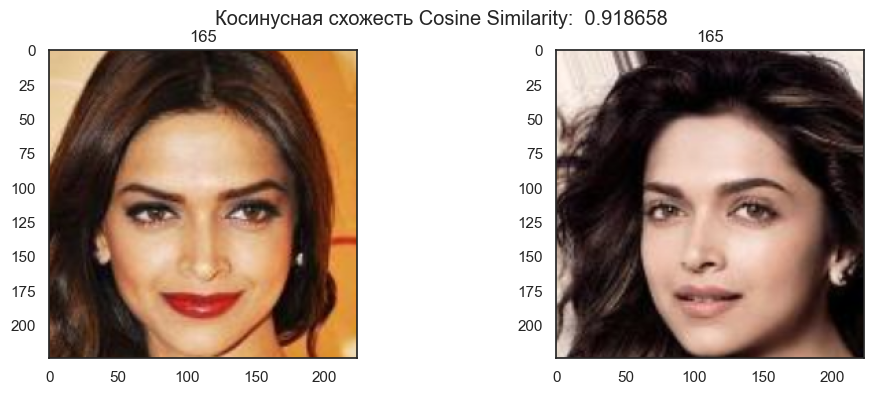

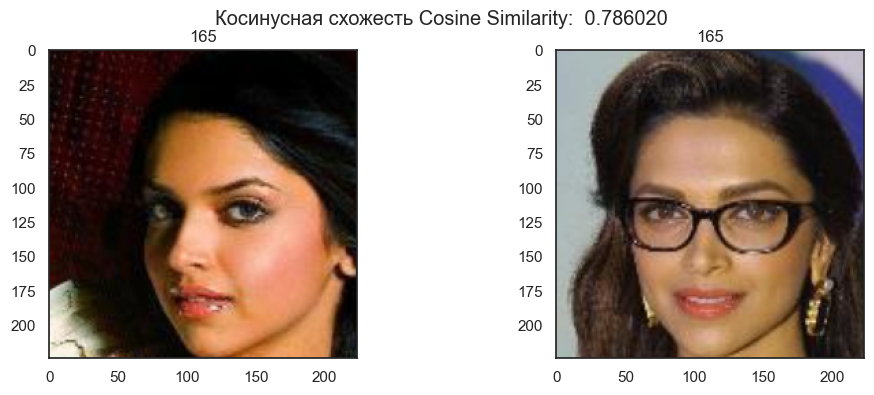

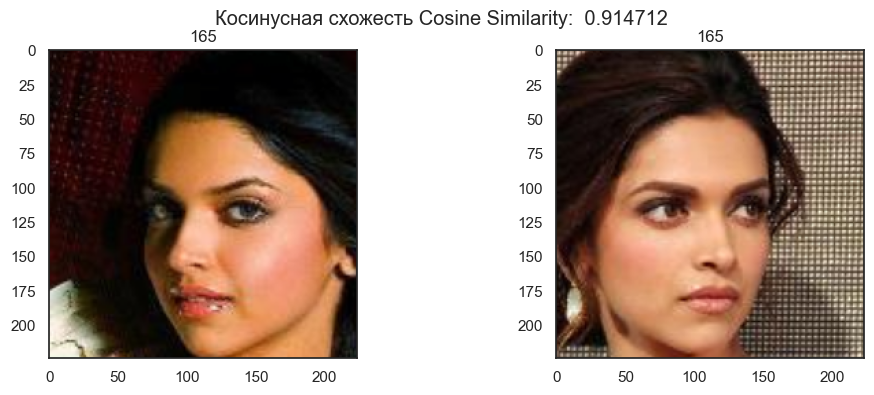

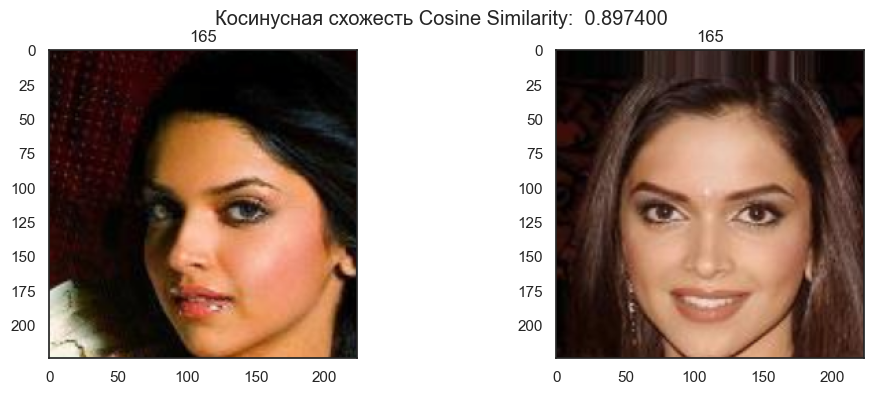

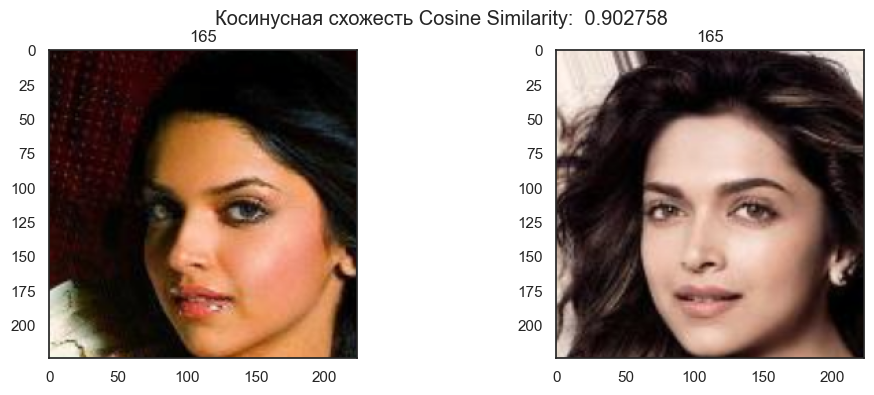

In [32]:
# парные изображения для выбранного персонажа
for i, y in enumerate(index_train): 
    for ii, yy in enumerate(index_test):
        plt.figure(figsize = (12, 4))
        index_tr, index_ts = index_train[i], index_test[ii]

        plt.subplot(1, 2, 1)
        imshow(embeddings['train_images'][y][0], normalize[0], title=embeddings['train_labels'][y][0])
        plt.subplot(1, 2, 2)
        imshow(embeddings['test_images'][yy][0], normalize[0], title=embeddings['test_labels'][yy][0])

        train_emb, test_emb = embeddings['train_emb_images'][y], embeddings['test_emb_images'][yy]
        cosine = np.dot(train_emb, test_emb) / (norm(train_emb) * norm(test_emb))
        
        plt.suptitle(f'Косинусная схожесть Cosine Similarity:  %f' % (cosine))
        plt.show()

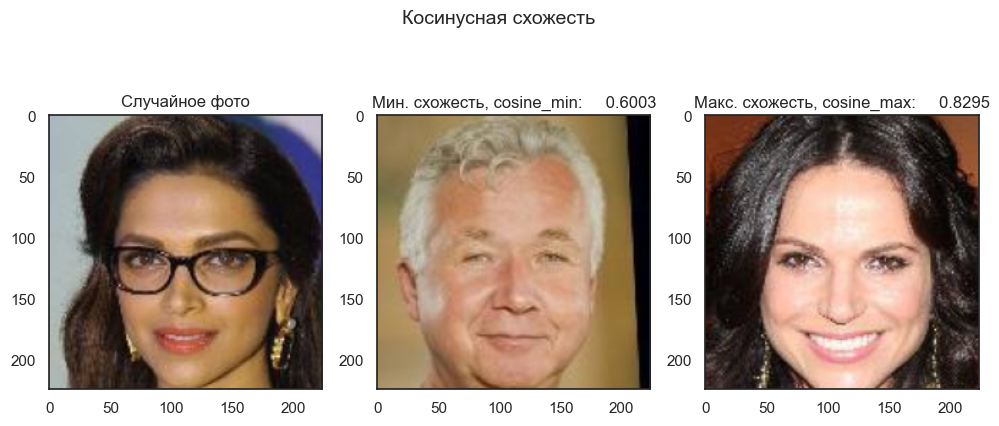

In [33]:
# нахождение пар с минимальной и максимальной косинусной близостью
index_min, index_max = 0, 0
cosine_min, cosine_max = 999, -999
test_emb = embeddings['test_emb_images'][index_test[0]]

for i in index_not_this_character:
    train_emb = embeddings['train_emb_images'][i]
    cosine = np.dot(train_emb, test_emb) / (norm(train_emb) * norm(test_emb))
    
    if cosine > cosine_max:
        index_max = i
        cosine_max = cosine
    elif cosine < cosine_min:
        index_min = i
        cosine_min = cosine

# визуализация изображений с минимальной и максимальной косинусной близостью
plt.figure(figsize = (12, 5))

plt.subplot(1, 3, 1)
imshow(embeddings['test_images'][index_test[0]][0], normalize[0], title = 'Случайное фото')
plt.subplot(1, 3, 2)
imshow(embeddings['train_images'][index_min][0], normalize[0], title = f'Мин. схожесть, cosine_min: {cosine_min: 10.4f}')
plt.subplot(1, 3, 3)
imshow(embeddings['train_images'][index_max][0], normalize[0], title = f'Макс. схожесть, cosine_max: {cosine_max: 10.4f}')

plt.suptitle('Косинусная схожесть', fontsize=14)
plt.show()

### Подытог

<div style='border: 3px solid #1f69b4; padding: 20px'>
    
Глядя на результаты определения косинусной схожести (**cosine_min и cosine_max**) людей на разнаых фотографиях очевидно, что модель правильно относит к похожим и не похожим персонажам

## Этап V.  Анализ косинусной схожести эмбеддингов

На данном этапе выполняется анализ косинусной схожести эмбеддингов для двух категорий пар изображений: уникальных (принадлежащих одному классу) и неуникальных (принадлежащих разным классам) пар. Основные этапы кода:

**1. Получение уникальных классов. Вычисление косинусной близости для пар уникальных и неуникальных классов**

На основе тренировочного набора данных получаются уникальные классы, то есть уникальные метки (лейблы) изображений.
Используя эмбеддинги изображений для тренировочного и тестового наборов данных, вычисляется косинусная близость для всех пар уникальных классов. Результаты сохраняются в списке result_unique.

Для каждого класса из уникальных классов вычисляется усредненный эмбеддинг для тестовых изображений этого класса. Затем вычисляется косинусная близость между усредненным эмбеддингом тестового изображения и эмбеддингами тренировочных изображений других классов. Результаты сохраняются в списке result_non_unique. Пропускаются классы, для которых нет тестовых изображений.

**2. Построение гистограмм распределения косинусной схожести**

Строится график с двумя подграфиками:
Первый подграфик (subplot) отображает гистограмму распределения косинусной схожести для уникальных пар изображений. Добавлены линии для среднего и медианы.
Второй подграфик отображает гистограмму распределения косинусной схожести для неуникальных пар изображений. Также добавлены линии для среднего и медианы.

Графики предоставляют визуальное представление о распределении косинусной схожести для уникальных и неуникальных пар изображений. Средние и медианные значения отмечены линиями на гистограмме для лучшего понимания распределения данных.

<div style='border: 3px solid #67a0f549; padding: 20px'>

**1. Получение уникальных классов. Вычисление косинусной близости для пар уникальных и неуникальных классов**

In [34]:
# получение уникальных классов
classes = np.unique(embeddings['train_labels'])

In [35]:
# создадим пустой список для записи в него результатов
result_unique = []

# вычисление косинусной близости для пар уникальных классов
for class_ in classes:
    index_train = np.where(embeddings['train_labels'] == class_)[0]
    index_test = np.where(embeddings['test_labels'] == class_)[0]
    
    for i, y in enumerate(index_train):
        for ii, yy in enumerate(index_test):
            index_tr, index_ts = index_train[i], index_test[ii]
            train_emb, test_emb = embeddings['train_emb_images'][y], embeddings['test_emb_images'][yy]
            cosine = np.dot(train_emb, test_emb) / (norm(train_emb) * norm(test_emb))
            result_unique.append(cosine)  

In [36]:
# создадим пустой список для записи в него результатов
result_non_unique = []

# вычисление косинусной близости для пар неуникальных классов
for class_ in classes:
    index_train = np.where(embeddings['train_labels'] != class_)[0]
    index_test = np.where(embeddings['test_labels'] == class_)[0]
    
    # пропуск классов, для которых нет тестовых изображений
    if len(index_test) == 0:
        continue
    
    # вычисление усредненного эмбеддинга для тестовых изображений
    test_emb = np.mean(np.array(embeddings['test_emb_images'])[index_test], axis = 0)
    
    for i in index_train:
        train_emb = embeddings['train_emb_images'][i]
        cosine = np.dot(train_emb, test_emb) / (norm(train_emb) * norm(test_emb))
        result_non_unique.append(cosine)

<div style='border: 3px solid #67a0f549; padding: 20px'>

**2. Построение гистограмм распределения косинусной схожести**

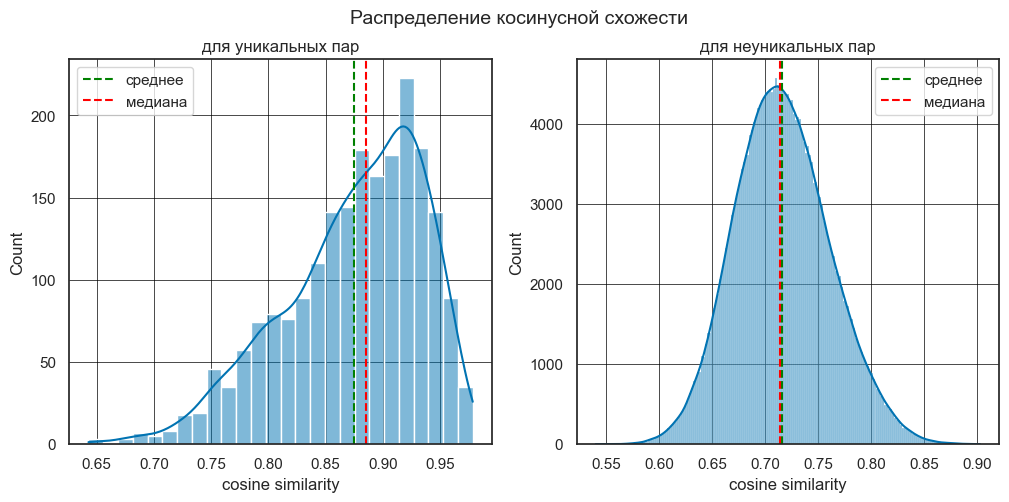

In [37]:
plt.figure(figsize = (12, 5))

# построение гистограммы для пар уникальных классов
plt.subplot(1, 2, 1)
sns.histplot(x = result_unique, stat = 'count', kde = True)
plt.axvline(x = np.mean(result_unique), color = 'green', linestyle = '--', label = 'среднее')
plt.axvline(x = np.median(result_unique), color = 'red', linestyle = '--', label = 'медиана')
plt.legend()
plt.xlabel('cosine similarity')
plt.title('для уникальных пар')
plt.grid(True)
plt.minorticks_on()
plt.grid(which = 'major', linestyle = '-', linewidth = '0.5', color = 'black')

# построение гистограммы для пар неуникальных классов
plt.subplot(1, 2, 2)
sns.histplot(x = result_non_unique, stat = 'count', kde = True)
plt.axvline(x = np.mean(result_non_unique), color = 'green', linestyle = '--', label = 'среднее')
plt.axvline(x = np.median(result_non_unique), color = 'red', linestyle = '--', label = 'медиана')
plt.grid(True)
plt.minorticks_on()
plt.grid(which = 'major', linestyle = '-', linewidth = '0.5', color = 'black')
plt.legend()
plt.xlabel('cosine similarity')
plt.title('для неуникальных пар')

plt.suptitle('Распределение косинусной схожести', fontsize = 14)
plt.show()

### Подытог

<div style='border: 3px solid #1f69b4; padding: 20px'>
    
1) Для неуникальных пар изображений характер распределения значений косинусной схожести обретает нормальный вид. Среднее и медиана почти равны и составляет около 0.715
    
2) Для уникальных пар распределение смещено вправо. Среднее значение 0.875 меньше медианы 0.89

# Реализация метрики: Identificaton rate metric

## Теоретическая часть

При обучении модели для распознавания лиц с помощью CE (кросс-энтропии) мы можем считать метрику accuracy как индикатор того, насколько хорошо модель работает. Но у accuracy тут есть недостаток: она не сможет померить, насколько хорошо модель работает на лицах людей, которых нет в обучающей выборке.  

Чтобы это исправить, есть метрика: **identification rate**. Вот как она работает:

Создается два набора изображений лиц: **query и distractors**. Никакие лица из этих наборов не должны содержаться в обучающем и валидационном датасете.

1. считаются косинусные расстояния между лицами, соответствующими одним и тем же людям из query части. Например, пусть одному человеку соответствуют три фото в query: 01.jpg, 02.jpg, 03.jpg. Тогда считаются три косинусных расстояния между всеми тремя парами из этих фото.
2. далее считаются косинусные расстояния между лицами, соответствующими разным людям из **query** части.
3. после этого вычисляются косинусные расстояния между всеми парами лиц из **query и distractors**. Т.е. пара — это (лицо из query, лицо из distractors). Всего получится |query|*|distractors| пар.
4. далее складываются количество пар, полученных на 2 и 3 шагах. Это количество **false** пар.
5. фиксируется **FPR** (false positive rate). Пусть, например, будет 0.01. FPR, умноженный на количество false пар из шага 4 — это разрешенное количество false positives, которые разрешается нашей модели. Обозначим это количество через N.
6. сортируются все значения косинусных расстояний **false** пар. N — ое по счету значение расстояния зафиксируем как **пороговое расстояние**.
7. считается количество **positive** пар с шага 1, которые имеют косинусное расстояние меньше, чем пороговое расстояние. Поделим это количество на общее количество positive пар с шага 1. Это будет TPR (true positive rate) — итоговое значение нашей метрики.

Такая метрика обычно обозначается как TPR@FPR=0.01. FPR может быть разным. Приразных FPR будет получаться разное TPR.

Смысл этой метрики в том, что мы фиксируем вероятность ошибки вида false positive, т.е. когда "сеть сказала, что это один и тот же человек, но это не так", считаем порог косинусного расстояния для этого значения ошибки, потом берем все positive пары и смотрим, у скольких из них расстояние меньше этого порога. Т.е. насколько точно наша сеть ищет похожие лица при заданной вероятности ошибки вида false positive.

**ЗАДАЧА**

Необходимо реализовать метрику TPR@FPR, рассчитать ее для полученной модели и тестового набора данных при значениях FPR=[0.5, 0.2, 0.1, 0.05].

## Вычисление и анализ метрик: косинусной близости, (TPR) и (FPR), для оценки качества модели

Основные шаги работы кода:

**1. Чтение аннотаций из файла**

Открывается файл с аннотациями для части запросов, где указано, какое изображение принадлежит к какому классу.
Извлекаются строки из файла и парсятся для создания списка пар изображений и соответствующих им классов.

**2. Вычисление вложений для запросов и отвлекателей**

Создается список имен изображений для запросов и списка имен изображений отвлекателей.
Для каждого из списка вычисляются вложения с использованием предварительно обученной модели нейронной сети.

**ОТВЛЕКАТЕЛИ:** В данном контексте "отвлекатели" представляют из себя изображения, которые служат для отвлечения внимания модели при выполнении задачи идентификации. Они используются для создания отрицательных пар запросов, где изображения разных классов сравниваются между собой. Отвлекатели помогают модели научиться различать изображения разных классов и улучшить её обобщающую способность.

**3. Вычисление косинусных сходств для положительных и отрицательных пар запросов**

Вычисляются косинусные сходства для положительных пар запросов (изображения одного класса) и отрицательных пар запросов (изображения разных классов). Это выполняется в функциях compute_cosine_query_pos и compute_cosine_query_neg.

**4. Вычисление косинусных сходств между запросами и отвлекателями**

Вычисляются косинусные сходства между вложениями запросов и вложениями отвлекателей. Это выполняется в функции compute_cosine_query_distractors.

**5. Тестирование функций для вычисления косинусных сходств**

Задаются тестовые данные и вычисляются косинусные сходства для положительных и отрицательных пар запросов, а также между запросами и отвлекателями.
Проверяется корректность вычислений с использованием утверждений.

**6. Вычисление уровня идентификации (Identification Rate)**

Вычисляется уровень идентификации для заданных уровней ложных срабатываний (False Positive Rate, FPR). Это выполняется в функции compute_ir.

**7. Визуализация результатов**

Вычисленные уровни идентификации и соответствующие им FPR отображаются на графике для наглядного анализа производительности модели.
В конце кода проводится тестирование, где проверяется корректность вычисленных значений уровней идентификации и их соответствие ожидаемым значениям для разных уровней ложных срабатываний.

<div style='border: 3px solid #67a0f549; padding: 20px'>

**1. Чтение аннотаций из файла**

In [38]:
# файл с аннотациями для части запросов: какое изображение принадлежит к какому классу
# выглядит в таком формат: image_name_1.jpg 2678
#        image_name_2.jpg 2679
f = open('D:\data\DLS\celebA_ir\celebA_anno_query.csv', 'r')
query_lines = f.readlines()[1:]
f.close()
query_lines = [x.strip().split(',') for x in query_lines]

# простой список имен изображений из запроса, необходим для вычисления вложений запроса
query_img_names = [x[0] for x in query_lines]

# словарь с информацией о том, какие изображения из запроса принадлежат какому классу
query_dict = defaultdict(list)
for img_name, img_class in query_lines:
    query_dict[img_class].append(img_name)

# список изображений-отвлекателей
distractors_img_names = os.listdir('D:\data\DLS\celebA_ir\celebA_distractors')

<div style='border: 3px solid #67a0f549; padding: 20px'>

**2. Вычисление вложений для запросов и отвлекателей**

In [39]:
def compute_embeddings(model, images_list, directory):
    '''
    Функция для вычисление вложений из обученной модели для списка изображений.
    Параметры:
        model: обученная модель нейронной сети, которая принимает изображения и выдает вложения
        images_list: список путей к изображениям для вычисления вложений
    Вывод:
        list: список вложений модели. Каждое вложение соответствует именам изображений из images_list
    '''
    list_emb = []
    modules = list(model.children())[:-1] 
    models_emb = nn.Sequential(*modules)
    
    transform = transforms.Compose([
      transforms.Resize(224),
      transforms.ToTensor(),
      transforms.Normalize(*normalize[0]),
    ])
    
    for file in images_list:
        image = Image.open(directory + file)
        image = transform(image)
        input_batch = image.unsqueeze(0) 
        with torch.no_grad():
            model.eval()
            emb = model(input_batch.to(device)).flatten().cpu().numpy()
            list_emb.append(emb)
    
    return list_emb  

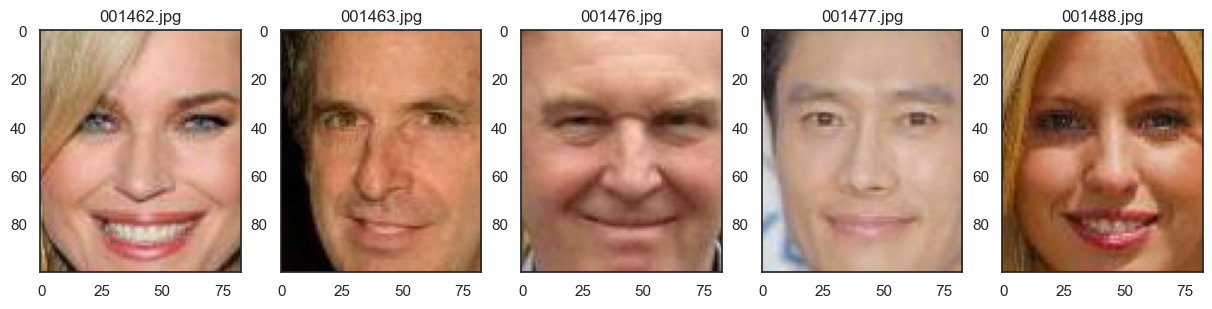

In [40]:
directory = 'D:\data\DLS\celebA_ir\celebA_distractors'
images_names = os.listdir(directory)[:5]
show_imgs(directory, images_names)

In [41]:
query_embeddings = compute_embeddings(model, query_img_names, 'D:\data\DLS\celebA_ir\celebA_query\\')
distractors_embeddings = compute_embeddings(model, distractors_img_names, 'D:\data\DLS\celebA_ir\celebA_distractors\\')

<div style='border: 3px solid #67a0f549; padding: 20px'>

**3. Вычисление косинусных сходств для положительных и отрицательных пар запросов**

In [42]:
def compute_cosine_query_pos(query_dict, query_img_names, query_embeddings):
    '''
    Вычисление косинусных сходств между положительными парами из запроса (этап 1).
    Параметры:
        query_dict: словарь {класс: [имя_изображения_1, имя_изображения_2, ...]}. 
                    Ключ: класс в наборе данных. Значение: изображения, соответствующие этому классу
        query_img_names: список имен изображений
        query_embeddings: список вложений, соответствующих query_img_names
    Вывод:
        list of floats: сходства между вложениями, соответствующими 
                        одним и тем же людям из списка запросов
    '''
    cosine_list = []
    for class_ in query_dict.keys():
        index = [i for i in range(len(query_img_names)) for elem in query_dict[class_] if elem == query_img_names[i]]
        emb = np.array(query_embeddings)[index]
        for i, elem in enumerate(emb):
            for ii in range(i + 1, len(emb)):
                cosine = np.dot(elem, emb[ii]) / (norm(elem) * norm(emb[ii]))
                cosine_list.append(cosine)
                
    return cosine_list

In [43]:
def compute_cosine_query_neg(query_dict, query_img_names, query_embeddings):
    '''
    Вычисление косинусных сходств между отрицательными парами из запроса (этап 2).
    Параметры:
        query_dict: словарь {класс: [имя_изображения_1, имя_изображения_2, ...]}. 
                    Ключ: класс в наборе данных. Значение: изображения, соответствующие этому классу
        query_img_names: список имен изображений
        query_embeddings: список вложений, соответствующих query_img_names
    Вывод:
        list of floats: сходства между вложениями, соответствующими 
                        разным людям из списка запросов
    '''
    cosine_list, index_del = [], []
    for class_ in query_dict.keys():
        index_tr = [i for i in range(len(query_img_names)) for elem in query_dict[class_] if elem == query_img_names[i]]
        index_del.extend(index_tr)
        emb_tr = np.array(query_embeddings)[index_tr]
        index_fl = [i for i in range(len(query_img_names)) if i not in index_del]
        emb_fl = np.array(query_embeddings)[index_fl]
        for elem_tr in emb_tr:
            for elem_fl in emb_fl:
                cosine = np.dot(elem_tr, elem_fl) / (norm(elem_tr) * norm(elem_fl))
                cosine_list.append(cosine)
                
    return cosine_list

<div style='border: 3px solid #67a0f549; padding: 20px'>
    
**4. Вычисление косинусных сходств между запросами и отвлекателями**

In [44]:
def compute_cosine_query_distractors(query_embeddings, distractors_embeddings):
    '''                   
    Вычисление косинусных сходств между отрицательными парами из запроса и отвлекателями (этап 3).
    Параметры:
        query_embeddings: список вложений, соответствующих query_img_names
        distractors_embeddings: список вложений, соответствующих distractors_img_names
    Вывод:
        list of floats: сходства между парами людей (q, d), где
                        q — вложение изображения из запроса,
                        d — вложение, соответствующее изображению отвлекателя               
    '''
    cosine_list = []
    for elem_tr in query_embeddings:
        for elem_fl in distractors_embeddings:
            cosine = np.dot(elem_tr, elem_fl) / (norm(elem_tr) * norm(elem_fl))
            cosine_list.append(cosine)
            
    return cosine_list

In [45]:
cosine_query_pos = compute_cosine_query_pos(query_dict, query_img_names, query_embeddings)
cosine_query_neg = compute_cosine_query_neg(query_dict, query_img_names, query_embeddings)
cosine_query_distractors = compute_cosine_query_distractors(query_embeddings, distractors_embeddings)

<div style='border: 3px solid #67a0f549; padding: 20px'>

**5. Тестирование функций для вычисления косинусных сходств**

In [46]:
# Словарь с изображениями для тестирования положительных пар
test_query_dict = {
    2876: ['1.jpg', '2.jpg', '3.jpg'],
    5674: ['5.jpg'],
    864: ['9.jpg', '10.jpg'],
}

# Список имен изображений для тестирования
test_query_img_names = ['1.jpg', '2.jpg', '3.jpg', '5.jpg', '9.jpg', '10.jpg']

# Список векторов вложений для тестирования
test_query_embeddings = [
    [1.56, 6.45, -7.68],
    [-1.1, 6.11, -3.0],
    [-0.06, -0.98, -1.29],
    [8.56, 1.45, 1.11],
    [0.7, 1.1, -7.56],
    [0.05, 0.9, -2.56],
]

# Список имен изображений для тестирования негативных пар
test_distractors_img_names = ['11.jpg', '12.jpg', '13.jpg', '14.jpg', '15.jpg']

# Список векторов вложений для тестирования негативных пар
test_distractors_embeddings = [
    [0.12, -3.23, -5.55],
    [-1, -0.01, 1.22],
    [0.06, -0.23, 1.34],
    [-6.6, 1.45, -1.45],
    [0.89, 1.98, 1.45],
]

# Вычисление косинусных сходств для положительных пар
test_cosine_query_pos = compute_cosine_query_pos(test_query_dict, test_query_img_names, 
                                                  test_query_embeddings)
# Вычисление косинусных сходств для негативных пар
test_cosine_query_neg = compute_cosine_query_neg(test_query_dict, test_query_img_names, 
                                                  test_query_embeddings)

# Вычисление косинусных сходств между вложениями тестовых и вложениями дистракторов
test_cosine_query_distractors = compute_cosine_query_distractors(test_query_embeddings, 
                                                            test_distractors_embeddings)

In [47]:
# Правильные значения для косинусных сходств положительных пар
true_cosine_query_pos = [0.8678237233650096, 0.21226104378511604,
                         -0.18355866977496182, 0.9787437979250561]

# Проверка на соответствие вычисленных значений ожидаемым значениям для положительных пар
assert np.allclose(sorted(test_cosine_query_pos), sorted(true_cosine_query_pos)), \
      "A mistake in compute_cosine_query_pos function"

# Правильные значения для косинусных сходств негативных пар
true_cosine_query_neg = [0.15963231223161822, 0.8507997093616965, 0.9272761484302097,
                         -0.0643994061127092, 0.5412660901220571, 0.701307100338029,
                         -0.2372575528216902, 0.6941032794522218, 0.549425446066643,
                         -0.011982733001947084, -0.0466679194884999]

# Проверка на соответствие вычисленных значений ожидаемым значениям для негативных пар
assert np.allclose(sorted(test_cosine_query_neg), sorted(true_cosine_query_neg)), \
      "A mistake in compute_cosine_query_neg function"

# Правильные значения для косинусных сходств между вложениями тестовых и вложениями дистракторов
true_cosine_query_distractors = [0.3371426578637511, -0.6866465610863652, -0.8456563512871669,
                                 0.14530087113136106, 0.11410510307646118, -0.07265097629002357,
                                 -0.24097699660707042, -0.5851992679925766, 0.4295494455718534,
                                 0.37604478596058194, 0.9909483738948858, -0.5881093317868022,
                                 -0.6829712976642919, 0.07546364489032083, -0.9130970963915521,
                                 -0.17463101988684684, -0.5229363015558941, 0.1399896725311533,
                                 -0.9258034013399499, 0.5295114163723346, 0.7811585442749943,
                                 -0.8208760031249596, -0.9905139680301821, 0.14969764653247228,
                                 -0.40749654525418444, 0.648660814944824, -0.7432584300096284,
                                 -0.9839696492435877, 0.2498741082804709, -0.2661183373780491]

# Проверка на соответствие вычисленных значений ожидаемым значениям для дистракторов
assert np.allclose(sorted(test_cosine_query_distractors), sorted(true_cosine_query_distractors)), \
      "A mistake in compute_cosine_query_distractors function"

<div style='border: 3px solid #67a0f549; padding: 20px'>

**6. Вычисление уровня идентификации (Identification Rate)**

In [48]:
def compute_ir(cosine_query_pos, cosine_query_neg, cosine_query_distractors, fpr = 0.1):
    '''
    Функция вычисляет уровень идентификации при заданной частоте ложных срабатываний (FPR).
    
    Параметры:
    - cosine_query_pos: косинусные сходства между положительными парами из запроса
    - cosine_query_neg: косинусные сходства между отрицательными парами из запроса
    - cosine_query_distractors: косинусные сходства между отрицательными парами из запроса и дистракторами
    - fpr: уровень ложных срабатываний, для которого вычисляется TPR

    Вывод:
    - float: порог для заданного уровня FPR
    - float: TPR при заданном FPR
    '''
    false_pairs = cosine_query_neg + cosine_query_distractors
    n = int(len(false_pairs) * fpr)
    threshold = sorted(false_pairs, reverse = True)[n]
    x = [x for x in cosine_query_pos if x > threshold]
    TPR = round(len(x) / len(cosine_query_pos), 2)
    
    return threshold, TPR

In [49]:
# вычисление порога и TPR для заданных FPR
test_thr, test_tpr = [], []
for fpr in [0.5, 0.3, 0.1]:
    x, y = compute_ir(test_cosine_query_pos, test_cosine_query_neg, test_cosine_query_distractors, fpr = fpr)
    test_thr.append(x)
    test_tpr.append(y)

In [50]:
# Правильные значения порога для заданных FPR
true_thr = [-0.011982733001947084, 0.3371426578637511, 0.701307100338029]
assert np.allclose(np.array(test_thr), np.array(true_thr)), "Ошибка в вычислении порога"

# Правильные значения TPR для заданных FPR
true_tpr = [0.75, 0.5, 0.5]
assert np.allclose(np.array(test_tpr), np.array(true_tpr)), "Ошибка в вычислении TPR"

In [51]:
# вычисление порога и TPR для заданных FPR с использованием реальных данных
threshold_list = []
tpr_list, fpr_list = [], [0.5, 0.2, 0.1, 0.05]
for fpr in fpr_list:
    x, y = compute_ir(cosine_query_pos, cosine_query_neg, cosine_query_distractors, fpr = fpr)
    threshold_list.append(x)
    tpr_list.append(y)

<div style='border: 3px solid #67a0f549; padding: 20px'>

**7. Визуализация результатов**

In [52]:
# функция для отображения TPR и FPR
def show_TPR_FPR(fpr_list, tpr_list):
    plt.figure(figsize = (12, 3))
    coords = list(zip(fpr_list, tpr_list))
    plt.plot(fpr_list, tpr_list, marker = 'o', markersize = 10, markerfacecolor = 'red')
    for i, txt in enumerate(coords):
        plt.annotate(f'fpr:{coords[i][0]}, tpr:{coords[i][1]}', (coords[i][0], coords[i][1])) 

    plt.ylabel('TPR')
    plt.xlabel('FPR')
    plt.title('True Positive Rate (TPR) @ False Positive Rate (FPR)')
    plt.grid(True)
    plt.minorticks_on()
    plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
    plt.show()

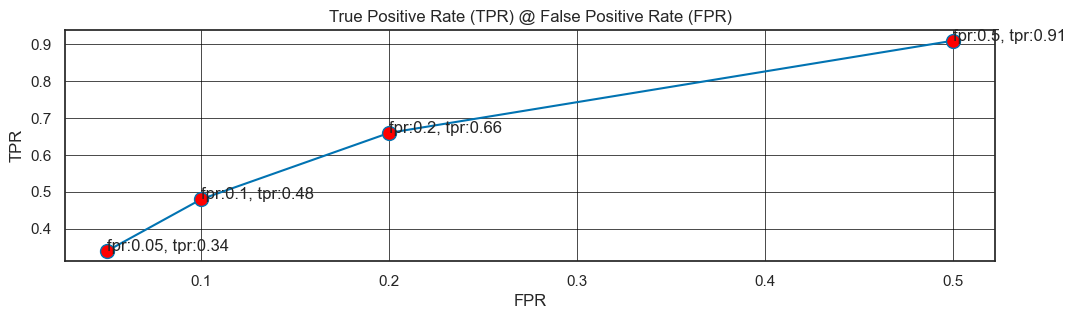

In [53]:
# Отобразим TPR и FPR
show_TPR_FPR(fpr_list, tpr_list)

### Подытог

<div style='border: 3px solid #1f69b4; padding: 20px'>
    
При FPR равному 0.5 значение TRP составляет 0.91

# Loss - функции (функции потерь)

Выше мы поняли, что нейросеть для распознавания лиц можно обучать разными способами. Два, которые мы упомянули — обучение сети на задачу классификации и с помощью contrastive loss. Давайте поговорим о том, какие лосс-функции мы можем использовать в том и в другом случае.

При построении сети для задачи 1 мы использовали обычную функцию потерь кросс-энтропии (CE loss). Однако существует много вариантов функций потерь, которые можно использовать для обучения нейронных сетей. Рассмотрим две из наиболее популярных. Дополнительные примеры функций потерь для распознавания лиц и обзоры их эффективности можно найти в этой статье: https://arxiv.org/pdf/1901.05903.pdf

## TripletLoss

### Теоретическая часть

Triplet Loss — это один из лоссов для contrastive learning. Чтобы учить модель с помощью этого лосса, модели не нужен последний классификационный слой. Этот лосс работает прямо с эмбеддингами $x_i$ элементов, которые выдает модель.

Снова скажем, что идея лосса — заставить эмбеддинги лиц одного человека быть более близкими по некоторому расстоянию, а эмбеддинги лиц разных людей — далекими друг от друга. Общая формула лосса выглядит так:

$$L(e, p, n) = max\{d(a, p) - d(a, n) + margin, 0\},$$

здесь
- $e$ — эмбеддинг входного лица (output модели)
- $p$ — "positive" эмбеддинг для входного лица (т.е. эмбеддинг такого элемента, что мы хотим, чтобы $e$ и $p$ были близки. В нашем случае это значит, что $e$ и $p$ должны быть выходами сети на два разных фото одного и того же человека).
- $n$ — "negative" эмбеддинг для входного лица (т.е. эмбеддинг такого элемента, что мы хотим, чтобы $e$ и $p$ были далеки. В нашем случае это значит, что $e$ и $p$ должны быть выходами сети на два разных фото разных людей).
- $d(x, y)$ — метрика расстояния между эмбеддингами, по которой мы их сравниваем.
- margin — гиперпараметр, который заставляет $d(a, p)$ и $d(a, n)$ быть еще дальше друг от друга.

**Эмбеддинги $e$, $p$ и $n$ нужно нормализовать, прежде чем подавать в лосс-функцию**.

У TripletLoss есть куча разных вариаций. В некоторых из них больше гиперпараметров, в других предлагают использовать больше одного позитивного и негативного эмбеддинга за раз. Где-то предлагается умный способ выбора negative эмбеддинга (например, выбирается такой, на котором нейросеть пока плохо работает, т.е. считает $e$ и $n$ близкими).

Пример реализации TripletLoss можно найти [здесь](https://pytorch.org/docs/stable/generated/torch.nn.TripletMarginWithDistanceLoss.html#torch.nn.TripletMarginWithDistanceLoss).

Будьте готовы, что TripletLoss придется настраивать, чтобы добиться хорошего результата при обучении сети.

**Что нужно учесть при реализации Triplet Loss**:
- при обучении мы обычно хотим следить за ходом обучения модели, считая какую-то метрику качества. Тут у нас больше нет классификационного слоя, так что accuracy мы считать не можем. Нужно придумать, как в случае Triplet Loss считать метрику качества на вализации в течение обучения. Подумайте, как можно это сделать?
- скорее всего, чтобы обучить сеть на Triplet Loss, придется написать кастомный Dalaset/Dataloader, который будет возвращать тройки элементов (anchor, positive, negative).
- не забудьте нормализовать эмбеддинги перед подсчетом лосса! Это можно сделать руками, а можно, например, добавить в конец сети batchnorm без обучаемых параметров.

**Доплитература по Triplet Loss**:

- Идея TripletLoss: https://en.wikipedia.org/wiki/Triplet_loss
- Хорошая статья про batch mining techniques для выбора positive и negative элементов: https://omoindrot.github.io/triplet-loss#triplet-mining
- Реализация TripletLoss в PyTorch : https://pytorch.org/docs/stable/generated/torch.nn.TripletMarginWithDistanceLoss.html#torch.nn.TripletMarginWithDistanceLoss
- Еще одна реализация TripletLoss: https://github.com/alfonmedela/triplet-loss-pytorch/blob/master/loss_functions/triplet_loss.py

### Трансферное обучение ResNet-50 для триплетной классификации, сравнение Batch All Triplet Loss и Batch Hard Triplet Loss на валидации, вычисление и визуализация метрик TPR и FPR

На данном этапе выполняется обучение двух моделей для трансферного обучения (Transfer Learning) с использованием предварительно обученной модели ResNet-50. Обучение производится на наборе данных, состоящем из тренировочных, валидационных и тестовых подвыборок. Для этого используются функции потерь для триплетов (batch_all_triplet_loss и batch_hard_triplet_loss).

Важные шаги в коде:

**1. Инициализация загрузчиков данных**

Создаются DataLoader'ы для тренировочного (train_loader_tl), валидационного (val_loader_tl) и тестового (test_loader_tl) наборов данных.

**2. Определение функций для вычисления попарных расстояний и масок**

pairwise_distances: вычисляет попарные косинусные расстояния между вложениями.
get_valid_positive_mask и get_valid_negative_mask: создают маски для положительных и отрицательных пар соответственно.
get_valid_triplets_mask: создает маску для валидных триплетов.

**3. Определение функций для вычисления триплет-потерь**

batch_all_triplet_loss: вычисляет триплет-потери для всех валидных триплетов в батче.
batch_hard_triplet_loss: вычисляет триплет-потери для самых сложных положительных и отрицательных примеров.

**4. Определение функции для вычисления True Positive Rate (TPR) и False Positive Rate (FPR)**

TPR_FPR: вычисляет TPR и FPR для заданной модели с использованием функций для вычисления вложений и косинусных сходств.

**5. Инициализация предварительно обученной модели ResNet-50. Определение оптимизатора, расписания обучения и классификатора k-ближайших соседей (KNN)**

Инициализируется предварительно обученная модель ResNet-50 и устанавливаются параметры для возможности дообучения.

Определены оптимизатор, расписание обучения и KNN для оценки точности на тестовых данных.

**6. Обучение моделей**

Обучается две модели с разными функциями потерь (batch_all_triplet_loss и batch_hard_triplet_loss) на тренировочном наборе данных.
Сохраняются веса модели с наилучшей точностью на валидационном наборе.

**7. Оценка производительности моделей на тестовом наборе**

Оценивается точность и потери для обеих моделей на тестовом наборе данных.

**8. Построение графиков TPR и FPR для обеих моделей**

Вычисляются и отображаются TPR и FPR для обеих моделей.

Обратите внимание, что для успешного выполнения кода необходимы определенные библиотеки и функции, такие как compute_embeddings, compute_cosine_query_pos, compute_cosine_query_neg, compute_cosine_query_distractors, compute_ir, show_TPR_FPR, и другие, которые должны быть определены в предыдущем коде или в общей среде выполнения.

<div style='border: 3px solid #67a0f549; padding: 20px'>
    
**1. Инициализация загрузчиков данных**

In [54]:
train_loader_tl = torch.utils.data.DataLoader(train_data, batch_size = BATCH_SIZE, shuffle = True)
val_loader_tl = torch.utils.data.DataLoader(val_data, batch_size = BATCH_SIZE, shuffle = False)
test_loader_tl = torch.utils.data.DataLoader(test_data, batch_size = BATCH_SIZE, shuffle = False)

<div style='border: 3px solid #67a0f549; padding: 20px'>

**2. Определение функций для вычисления попарных расстояний и масок**

In [55]:
def pairwise_distances(embeddings, squared = False):
    '''
    Функция вычисляет попарные расстояния между векторами в embeddings.

    Параметры:
    - embeddings: тензор с векторами
    - squared: опциональный флаг для возвращения квадрата расстояний

    Вывод:
    - тензор с попарными расстояниями
    '''
    dot_product = embeddings.mm(embeddings.t())
    square_sum = dot_product.diag()
    distances = square_sum.unsqueeze(1) - 2 * dot_product + square_sum.unsqueeze(0)
    distances = distances.clamp(min=0)

    if not squared:
        epsilon = 1e-16
        mask = torch.eq(distances, 0).float()
        distances = distances + mask * epsilon
        distances = torch.sqrt(distances)
        distances = distances * (1 - mask)

    return distances

In [56]:
def get_valid_positive_mask(labels):
    """
    Для валидной положительной пары (a, p):
        - a и p - различные векторы
        - a и p имеют одинаковые метки
    """
    indices_equal = torch.eye(labels.size(0), device = labels.device, dtype = torch.bool)
    indices_not_equal = ~indices_equal
    label_equal = torch.eq(labels.unsqueeze(1), labels.unsqueeze(0))
    mask = indices_not_equal & label_equal
    
    return mask

In [57]:
def get_valid_negative_mask(labels):
    """
    Для валидной отрицательной пары (a, n):
        - a и n - различные векторы
        - a и n имеют разные метки
    """
    indices_equal = torch.eye(labels.size(0), device=labels.device, dtype = torch.bool)
    indices_not_equal = ~indices_equal
    label_not_equal = torch.ne(labels.unsqueeze(1), labels.unsqueeze(0))
    mask = indices_not_equal & label_not_equal
    
    return mask

In [58]:
def get_valid_triplets_mask(labels):
    """
    Чтобы тройка (a, p, n) была валидной, она должна удовлетворять:
        - a, p, n - различные векторы
        - a и p имеют одинаковые метки, в то время как a и n имеют разные метки
    """
    indices_equal = torch.eye(labels.size(0), device=labels.device, dtype = torch.bool)
    indices_not_equal = ~indices_equal
    i_ne_j = indices_not_equal.unsqueeze(2)
    i_ne_k = indices_not_equal.unsqueeze(1)
    j_ne_k = indices_not_equal.unsqueeze(0)
    distinct_indices = i_ne_j & i_ne_k & j_ne_k

    label_equal = torch.eq(labels.unsqueeze(1), labels.unsqueeze(0))
    i_eq_j = label_equal.unsqueeze(2)
    i_eq_k = label_equal.unsqueeze(1)
    i_ne_k = ~i_eq_k
    valid_labels = i_eq_j & i_ne_k
    mask = distinct_indices & valid_labels
    
    return mask

<div style='border: 3px solid #67a0f549; padding: 20px'>
    
**3. Определение функций для вычисления триплет-потерь**

In [59]:
def batch_all_triplet_loss(labels, embeddings, margin, squared = False):
    """
    Функция получает triplet loss для всех валидных троек и усредняет их для троек, у которых потеря положительная
    
    """

    distances = pairwise_distances(embeddings, squared = squared)

    anchor_positive_dist = distances.unsqueeze(2)
    anchor_negative_dist = distances.unsqueeze(1)
    triplet_loss = anchor_positive_dist - anchor_negative_dist + margin

    mask = get_valid_triplets_mask(labels)

    triplet_loss = triplet_loss * mask.float()
    triplet_loss.clamp_(min = 0)

    epsilon = 1e-16
    num_positive_triplets = (triplet_loss > 0).float().sum()
    num_valid_triplets = mask.float().sum()

    triplet_loss = triplet_loss.sum() / (num_positive_triplets + epsilon)

    return triplet_loss

In [60]:
def batch_hard_triplet_loss(labels, embeddings, margin, squared = False):
    """
    - вычисление матрицы расстояний
    - для каждого anchor a0, находится пара (a0, p0) с максимальным расстоянием, таким образом, что a0 и p0 имеют одинаковые метки
    - для каждого anchor a0, находится пара (a0, n0) с минимальным расстоянием, таким образом, что a0 и n0 имеют разные метки
    - вычисление triplet loss для каждой тройки (a0, p0, n0) и их усреднение
    """
    distances = pairwise_distances(embeddings, squared = squared)

    mask_positive = get_valid_positive_mask(labels)
    hardest_positive_dist = (distances * mask_positive.float()).max(dim = 1)[0]

    mask_negative = get_valid_negative_mask(labels)
    max_negative_dist = distances.max(dim = 1, keepdim = True)[0]
    distances = distances + max_negative_dist * (~mask_negative).float()
    hardest_negative_dist = distances.min(dim = 1)[0]

    triplet_loss = (hardest_positive_dist - hardest_negative_dist + margin).clamp(min = 0)
    triplet_loss = triplet_loss.mean()

    return triplet_loss

In [61]:
loaders = {'train': train_loader_tl, 'valid': val_loader_tl}
functions = {'batch_all_triplet_loss': batch_all_triplet_loss, 'batch_hard_triplet_loss': batch_hard_triplet_loss}

<div style='border: 3px solid #67a0f549; padding: 20px'>

**4. Определение функции для вычисления True Positive Rate (TPR) и False Positive Rate (FPR)**

In [62]:
def TPR_FPR(model):
    '''
    Вычисляет True Positive Rate (TPR) и False Positive Rate (FPR) для модели.

    Параметры:
    - model: обученная модель

    Вывод:
    - fpr_list: список значений FPR
    - tpr_list: список значений TPR
    '''
    query_embeddings = compute_embeddings(model, query_img_names, 'D:/data/DLS/celebA_ir/celebA_query/')
    distractors_embeddings = compute_embeddings(model, distractors_img_names, 'D:/data/DLS/celebA_ir/celebA_distractors/')
    cosine_query_pos = compute_cosine_query_pos(query_dict, query_img_names, query_embeddings)
    cosine_query_neg = compute_cosine_query_neg(query_dict, query_img_names, query_embeddings)
    cosine_query_distractors = compute_cosine_query_distractors(query_embeddings, distractors_embeddings)

    threshold_list = []
    tpr_list, fpr_list = [], [0.5, 0.2, 0.1, 0.05]
    for fpr in fpr_list:
        x, y = compute_ir(cosine_query_pos, cosine_query_neg, cosine_query_distractors, fpr = fpr)
        threshold_list.append(x)
        tpr_list.append(y)
    return fpr_list, tpr_list

<div style='border: 3px solid #67a0f549; padding: 20px'>
    
**5. Инициализация предварительно обученной модели ResNet-50. Определение оптимизатора, расписания обучения и классификатора k-ближайших соседей (KNN)**

In [63]:
resnet = models.resnet50(pretrained = True)

for param in resnet.parameters():
    param.requires_grad_(True)

modules = list(resnet.children())[:-1]
model_TL = nn.Sequential(*modules).to(device)

optimizer = AdamW(model_TL.parameters(), lr = LEARNING_RATE, weight_decay = WEIGHT_DECAY, betas = (0.95, 0.999))
scheduler = ReduceLROnPlateau(optimizer, 'min', patience = 30)
knn = KNeighborsClassifier(metric = 'cosine')

<div style='border: 3px solid #67a0f549; padding: 20px'>
    
**6. Обучение моделей**

In [64]:
def train2(model, optimizer, scheduler, epochs, loaders, loss_fn, margin, file_name):
    """
    Обучение модели и отслеживание метрик обучения.

    Параметры:
    - model: модель для обучения
    - optimizer: оптимизатор
    - scheduler: планировщик
    - epochs: количество эпох
    - loaders: загрузчики данных
    - loss_fn: функция потерь
    - margin: значение параметра margin для функции потерь
    - file_name: имя файла для сохранения весов модели
    """
    best_score, valid_loss = 0, 0

    for epoch in range(epochs):
        labels_list, predictions_list, emb_list = [], [], []
        result['epoch'].append(epoch + 1)

        for mode, dataloader in tqdm(loaders.items()):
            loss_result = []

            for X_batch, Y_batch in dataloader:
                X_batch = X_batch.to(device)
                Y_batch = Y_batch.to(device)

                if mode == 'train':
                    model.train()
                    optimizer.zero_grad()
                    emb = torch.flatten(model(X_batch), start_dim = 1)
                else:
                    model.eval()
                    with torch.no_grad():
                        emb = torch.flatten(model(X_batch), start_dim = 1)

                loss = functions[loss_fn](Y_batch, emb, margin)
                loss_result.append(loss.cpu().detach().numpy())
                emb_list.extend(emb.cpu().detach().numpy())
                labels_list.extend(Y_batch.cpu().numpy())

                if mode == 'train':
                    loss.backward()
                    optimizer.step()

            features, target = np.array(emb_list), np.array(labels_list)
            if mode == 'train':
                knn.fit(features, target)
                predictions = knn.predict(features)
            else:
                predictions = knn.predict(features)

            accuracy = accuracy_score(target, predictions)
            result[str(mode) + '_loss'].append(np.mean(loss_result))
            result[str(mode) + '_accuracy'].append(accuracy)

            if mode == 'valid':
                if accuracy > best_score:
                    best_score = accuracy
                    torch.save(model.state_dict(), f'saved_weights_{file_name}.pt')
                valid_loss = np.mean(loss_result)

            lr = optimizer.param_groups[0]['lr']
            scheduler.step(valid_loss)

        clear_output(wait=True)
        print(f'epoch training: {epoch + 1}, lr optimizer: {lr}, loss value validate: {valid_loss: 10.4f}, accuracy validate: {accuracy: 10.4f}')
        print()

        show_result(result, best_score)

### Запуск обучения (epochs = 30)

epoch training: 30, lr optimizer: 1e-05, loss value validate:     0.5227, accuracy validate:     0.7375



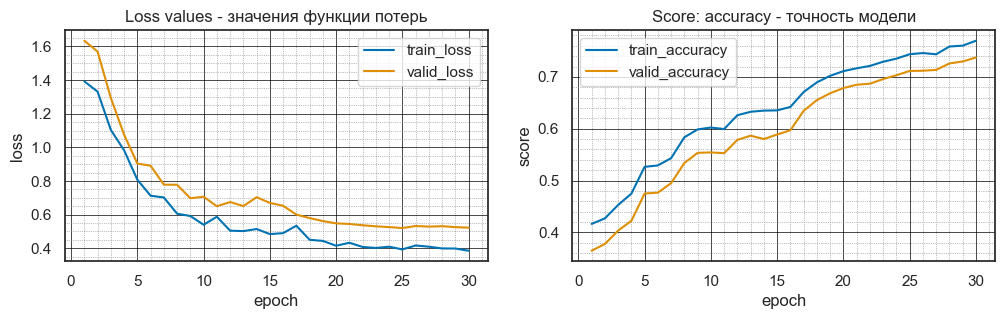

CPU times: total: 1h 17min 42s
Wall time: 21min 28s


In [65]:
%%time

# словарь для хранения результатов
result = {'epoch': [], 'train_loss': [], 'valid_loss': [], 'train_accuracy': [], 'valid_accuracy': [] }

# количество эпох обучения
epochs = 30

# Обучение модели
train2(model_TL, optimizer, scheduler, epochs, loaders, 'batch_all_triplet_loss', 0.4, 'resnet_50_tl_batch_all')

<div style='border: 3px solid #67a0f549; padding: 20px'>
    
**7. Оценка производительности моделей на тестовом наборе**

In [66]:
def evaluate2(model, dataloader, loss_fn, margin):
    """
    Оценка модели на валидационном или тестовом наборе данных.

    Параметры:
    - model: обученная модель
    - dataloader: загрузчик данных
    - loss_fn: функция потерь
    - margin: значение параметра margin для функции потерь

    Вывод:
    - accuracy: точность модели
    - mean_loss: среднее значение функции потерь
    - features: извлеченные признаки
    - target: метки целевых классов
    """
    loss_result = []
    labels_list, predictions_list, emb_list = [], [], []

    for X_batch, Y_batch in dataloader:
        X_batch = X_batch.to(device)
        Y_batch = Y_batch.to(device)

        with torch.no_grad():
            model.eval()
            emb = torch.flatten(model(X_batch), start_dim = 1)

        loss = functions[loss_fn](Y_batch, emb, margin)
        loss_result.append(loss.cpu().detach().numpy())

        emb_list.extend(emb.cpu().detach().numpy())
        labels_list.extend(Y_batch.cpu().numpy())

    features, target = np.array(emb_list), np.array(labels_list)
    predictions = knn.predict(features)
    accuracy = accuracy_score(target, predictions)

    return accuracy, np.mean(loss_result), features, target

In [67]:
test_accuracy_tl_batch_all, test_loss, features, labels = evaluate2(model_TL, test_loader_tl, 'batch_all_triplet_loss', 0.4)
print(f'test loss: {test_loss: 10.4f}, test accuracy: {test_accuracy_tl_batch_all: 10.4f}')
df_tl_batch_all = pd.DataFrame(result)[['epoch', 'valid_accuracy']]

test loss:     0.5153, test accuracy:     0.6111


In [68]:
resnet = models.resnet50(pretrained = True)

for param in resnet.parameters():
    param.requires_grad_(True)

modules = list(resnet.children())[:-1]
model_TL_bh = nn.Sequential(*modules).to(device)

optimizer = AdamW(model_TL_bh.parameters(), lr = LEARNING_RATE, weight_decay = WEIGHT_DECAY, betas = (0.95, 0.999))
scheduler = ReduceLROnPlateau(optimizer, 'min', patience = 24)
knn = KNeighborsClassifier(metric = 'cosine')

### Запуск обучения (epochs = 30)

epoch training: 30, lr optimizer: 1.0000000000000002e-06, loss value validate:     1.1090, accuracy validate:     0.8089



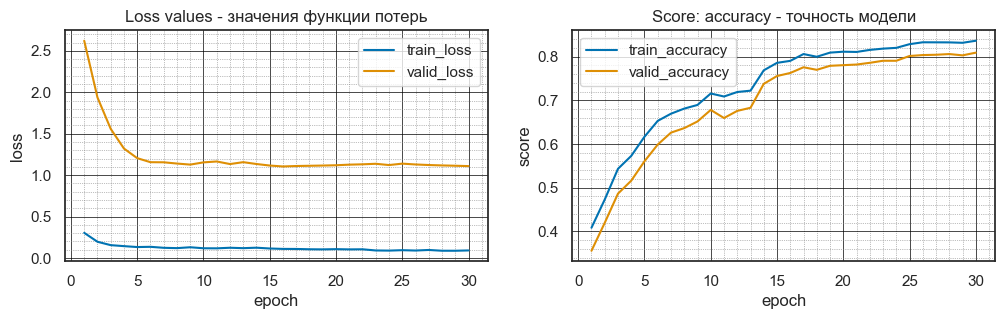

CPU times: total: 1h 17min 31s
Wall time: 21min 30s


In [69]:
%%time

# словарь для хранения результатов
result = {'epoch': [], 'train_loss': [], 'valid_loss': [], 'train_accuracy': [], 'valid_accuracy': [] }

# количество эпох обучения
epochs = 30

# Обучение модели
train2(model_TL_bh, optimizer, scheduler, epochs, loaders, 'batch_hard_triplet_loss', 1, 'resnet_50_tl_batch_hard')

In [70]:
test_accuracy_tl_batch_hard, test_loss, features, labels = evaluate2(model_TL_bh, test_loader_tl, 'batch_hard_triplet_loss', 1)
print(f'test loss: {test_loss: 10.4f}, test accuracy: {test_accuracy_tl_batch_hard: 10.4f}')
df_tl_batch_hard = pd.DataFrame(result)[['epoch', 'valid_accuracy']]

test loss:     1.0710, test accuracy:     0.6728


### Подытог

<div style='border: 3px solid #1f69b4; padding: 20px'>

Результаты обучения модели с **batch_all_triplet_loss:**
- модель: train2(model_TL, optimizer, scheduler, epochs, loaders, 'batch_all_triplet_loss', 0.4, 'resnet_50_tl_batch_all')
- epoch training: 30, lr optimizer: 1e-05, loss value validate:     0.5227, accuracy validate:     0.7375
- test loss:     0.5153, test accuracy:     0.6111

Результаты обучения модели с **batch_hard_triplet_loss:**
- модель: train2(model_TL_bh, optimizer, scheduler, epochs, loaders, 'batch_hard_triplet_loss', 1, 'resnet_50_tl_batch_hard')
- epoch training: 30, lr optimizer: 1e-06, loss value validate:     1.1090, accuracy validate:     0.8089
- test loss:     1.0710, test accuracy:     0.6728

<div style='border: 3px solid #67a0f549; padding: 20px'>
    
**8. Построение графиков TPR и FPR для обеих моделей**

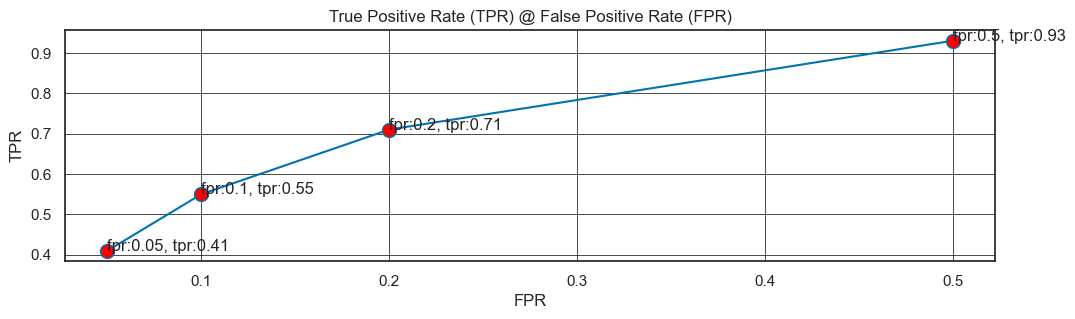

In [71]:
fpr_tl_ba, tpr_tl_ba = TPR_FPR(model_TL)
show_TPR_FPR(fpr_tl_ba, tpr_tl_ba)

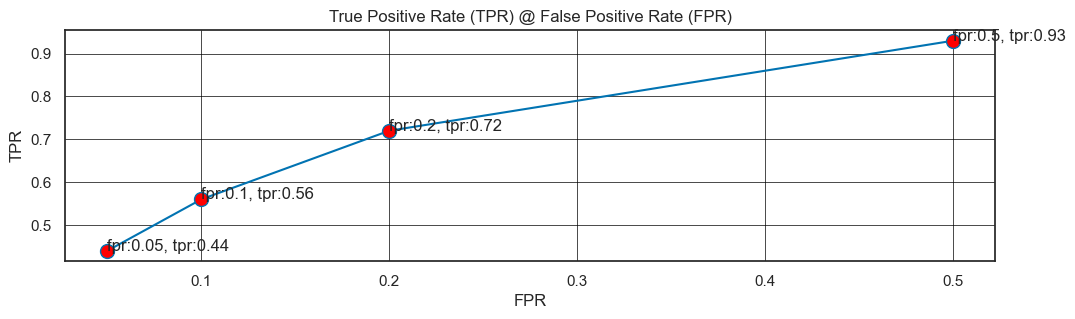

In [72]:
fpr_tl_bh, tpr_tl_bh = TPR_FPR(model_TL_bh)
show_TPR_FPR(fpr_tl_bh, tpr_tl_bh)

### Выводы: Общие выводы по функциям потерь

<div style='border: 3px solid #1f69b4; padding: 20px'>
    
Результаты **TPR_FPR** практически идентичны с минимальным отличием: использование функции потерь triplet loss дает чуть бОльшую площадь под кривой, а значит, что даже при минимальном значении порога FPR можно получить больше количество правильных положительных ответов, чем при использовании в качестве лосса кросс-энтропии

## ArcFace Loss (Additive Angular Margin Loss)

### Теоретическая часть

В случае с обучением на задачу классификации лосс-функция, которая нам приходит в голову — Cross-Entropy. И на нее действительно можно обучать сеть для распознавания лиц. Но за много лет люди придумали более хитрые лосс-функции, которые делают обучение сети для распознавания лиц более эффективным. Одним из лучших считается ArcFace Loss (Additive Angular Margin Loss).

Этот лосс — чуть измененная кросс-энтропия. Он позволяет достичь лучшего распределения векторов лиц на сфере. В нем добавлены некоторые дополнительные ограничения и гиперпараметры, для того чтобы эмбеддинги лиц одного класса были более близки между собой, а эмбеддинги лиц разных людей оставались далеки. То есть, этот лосс позволяет лучше кластеризовать лица на сфере единичного радиуса.

**Как устроен ArcFace**:

Стандартные SoftMax + кросс-энтропия (CE) выглядят так:

$$L_{CE} = \frac{-1}{N}\sum_1^N \frac{e^{W_{y_i}^{T}x_i + b_{y_i}}}{\sum^n_{j=1}e^{W_j^Tx_i+b_j}},$$

здесь:
- $x_i \in \mathbb{R^d}$ — вектор $i$-го элемента обучающей выборки перед последним полносвязным слоем сети. $y_i$ — класс этого элемента;
- $W_j \in \mathbb{R^d}$ — j-ый столбец матрицы весов последнего слоя сети (т.е. слоя, который производит итоговую классификацю входящего объекта);
- $b_j \in \mathbb{R^d}$ — j-ый элемент вектора байеса последнего слоя сети;
- $N$ — batch size;
- $n$ — количество классов.


Хотя этот лосс работает хорошо, он явным образом не заставляет эмбеддинги $x_i$ элементов, принадлежащих одному классу, быть близкими друг к другу по расстоянию. И не заставляет эмбеддинги элементов, принадлежащих разным классам, быть далеко друг от друга. Все, что хочет этот лосс — чтобы на основе эмбеддингов $x_i$ можно было хорошо классифицировать элементы, никакие ограничений на расстояния между эмбеддингами $x_i$ он не вводит.

Из-за этого у нейросетей для распознавания лиц, которые обучены на обычном CE loss, бывают проблемы с распознаванием лиц, которые сильно отличаются от лиц того же человека разными допатрибутами (шляпа/прическа/очки и т.п.). Просто эмбеддинг для таких лиц получается довольно далек по расстоянию от других эмбеддингов лиц этого же человека.

Давайте теперь немного поправим формулу:
- уберем байес последнего слоя, т.е. сделаем $b_j=0$;
- нормализуем веса последнего слоя: ||$W_j$|| = 1;
- нормализуем эмбеддинги: ||$x_i$|| = 1. Перед подачей их на вход последнему слою (т.е. перед умножением на матрицу $W_j$) умножим их на гиперпараметр s. По сути, мы приводим норму всех эмбеддингов к s. Смысл этого гиперпараметра в том, что, возможно, сети проще будет классифицировать эмбеддинги, у которых не единичная норма.

Нормализация эмбеддингов приводит к тому, что эмбеддинги начинают быть распределены по сфере единичного радиуса (и сфере радиуса s после умножения на ниперпараметр s). И итоговые предсказания сети после последнего слоя зависят только от угла между эмбеддингами $x_i$ и выученных весов $W_j$. От нормы эмбеддинга $x_i$ они больше не зависят, т.к. у всех эмбеддингов они теперь одинаковые.

Получается, в степени экспоненты у нас останется выражение $s W_{y_i}^{T}x_i$, которое можно переписать в виде  $s W_{y_i}^{T}x_i = s ||W_{y_i}||\cdot ||x_i|| \cdot cos\Theta_{y_i}$. Тут $\Theta_{y_i}$ — это угод между векторами $W_{y_i}$ и $x_i$. Но так как мы сделали нормы $W_{y_i}$ и $x_i$ единичными, то все это выражение просто будет равно $s cos\Theta_{y_i}$.

В итоге мы получим следующую формулу лосса:

$$L = \frac{-1}{N}\sum_1^N \frac{e^{s\ cos\Theta_{y_i}}}{e^{s\ cos\Theta_{y_i}} + \sum^n_{j=1,\ j\ne y_i} e^{s\ cos\Theta_j}}$$


И последний шаг. Добавим еще один гиперпараметр $m$. Он называется additive angular margin penalty и заставляет эмбеддинги одного класса быть ближе друг к другу, а эмбеддинги разных классов — более далекими друг от друга.

В итоге получим вот что:

$$L_{ArcFace} = \frac{-1}{N}\sum_1^N \frac{e^{s\ cos(\Theta_{y_i} + m)}}{e^{s\ cos(\Theta_{y_i} + m)} + \sum^n_{j=1,\ j\ne y_i} e^{s\ cos\Theta_j}}$$

Это и есть ArcFace Loss с двумя  гиперпараметрами, s и m.

Получается, что ArcFace Loss завтавляет сеть выучивать эмбеддинги, распределенные по сфере радиуса s, причем чтобы эмбеддинги одного класса были ближе друг к другу, а эмбеддинги разных классов — более далеки друг от друга.


**Доплнительная литература по ArcFace Loss:**

Оригинальная статья: https://arxiv.org/pdf/1801.07698.pdf

Репозиторий с кодом: https://github.com/deepinsight/insightface

### Обучение модели ResNet-18 с ArcFace Loss для классификации, сравнение с CrossEntropyLoss, вычисление и визуализация TPR и FPR, а также сравнительная визуализация embeddings с t-SNE.

Обучение модели ResNet-18 с использованием функции потерь ArcFace для задачи классификации, анализ и сравнение результатов с обычной CrossEntropyLoss, вычисление и визуализация метрик True Positive Rate (TPR) и False Positive Rate (FPR) для оценки производительности модели, а также сравнительная визуализация вложений (embeddings) с использованием t-SNE. 

Основные шаги, выполняемые в коде:

**1. Определение класса ArcFace Loss. Функция forward для ArcFace Loss**

Определяется класс ArcFace, являющийся наследником nn.Module. Он принимает размеры входных и выходных признаков, а также параметры scale и margin_arc для настройки функции потерь ArcFace.

В функции forward рассчитываются нормы векторов весов и входных вложений.
Затем вычисляется косинус угла между вложениями и весами.
Если переданы метки классов (label), производится коррекция косинуса с использованием параметров sin_m, cos_m и scale.

**2. Определение модели ModelNet**

Определяется класс ModelNet, наследующий nn.Module, с использованием предварительно обученной модели ResNet-18 в качестве основы и ArcFace в качестве функции потерь.

**3. Инициализация ResNet-18 и модификация последнего слоя**

Загружается предварительно обученная модель ResNet-18.
Последний полносвязанный слой заменяется на новый слой с количеством выходных классов n_classes.

**4. Инициализация модели ModelNet, критерия, оптимизатора и расписания обучения. Обучение модели**

Создается экземпляр ModelNet с ArcFace loss, оптимизатор AdamW, и критерий CrossEntropyLoss.

Далее используется функция train для обучения модели с использованием тренировочного DataLoader'а.
Параметры обучения, такие как число эпох, оптимизатор, критерий, и DataLoader'ы, задаются перед обучением.

**5. Оценка модели на тестовом наборе. Получение вложений и меток для визуализации**

Используется функция evaluate для оценки точности и потерь на тестовом DataLoader'е.

Далее получаются вложения (emb_list_arc) и метки (labels_list_arc) для дальнейшей визуализации.

**6. Визуализация вложений с использованием t-SNE**

Производится визуализация вложений в двумерном пространстве с использованием t-SNE для сравнения двух случаев: до применения 
ArcFace и после него.
Создаются графики для визуализации отдельных вложений.
Код также включает в себя использование функций TPR_FPR и show_TPR_FPR для вычисления и визуализации True Positive Rate (TPR) и False Positive Rate (FPR) для модели ArcFace.

<div style='border: 3px solid #67a0f549; padding: 20px'>
    
**1. Определение класса ArcFace Loss**

In [73]:
# класс ArcFace для реализации ArcFace лосса
class ArcFace(nn.Module):
    def __init__(self, in_features, out_features, scale = 5, margin_arc = 0.5):
        super().__init__()
        self.scale = scale
        self.sin_m = torch.sin(torch.tensor(margin_arc))
        self.cos_m = torch.cos(torch.tensor(margin_arc))
        self.out_features = out_features
        self.fc = nn.Linear(in_features, out_features, bias = False)

    def forward(self, x, label = None):
        w_L2 = torch.linalg.norm(self.fc.weight.detach(), dim = 1, keepdim = True).T
        x_L2 = torch.linalg.norm(x, dim = 1, keepdim = True)
        cos = self.fc(x) / (x_L2 * w_L2)

        if label is not None:
            sin_m, cos_m = self.sin_m, self.cos_m
            one_hot = F.one_hot(label, num_classes = self.out_features)
            sin = (1 - cos ** 2) ** 0.5
            angle_sum = cos * cos_m - sin * sin_m
            cos = angle_sum * one_hot + cos * (1 - one_hot)
            cos = cos * self.scale

        return cos

<div style='border: 3px solid #67a0f549; padding: 20px'>

**2. Определение модели ModelNet**

In [74]:
# класс ModelNet с использованием ArcFace лосса
class ModelNet(nn.Module):
    def __init__(self, channel_size, out_features, backbone, margin):
        super(ModelNet, self).__init__()
        self.backbone = backbone
        self.margin = ArcFace(in_features = channel_size, out_features=out_features, margin_arc = margin)

    def forward(self, x, labels = None):
        x = self.backbone(x)
        if labels is not None:
            return self.margin(x, labels)
        
        return x

<div style='border: 3px solid #67a0f549; padding: 20px'>
    
**3. Инициализация ResNet-18 и модификация последнего слоя**

In [75]:
# инициализация предобученной ResNet18 и ее адаптация под задачу классификации
resnet = models.resnet18(pretrained = True)

for param in resnet.parameters():
    param.requires_grad_(True)

resnet.fc = nn.Sequential(
    nn.Linear(resnet.fc.in_features, n_classes)
)

<div style='border: 3px solid #67a0f549; padding: 20px'>
    
**4. Инициализация модели ModelNet, критерия, оптимизатора и расписания обучения**

In [76]:
# создание модели с использованием ArcFace лосса
model_arc = ModelNet(n_classes, n_classes, resnet, 0.05).to(device)

# инициализация функции потерь, оптимизатора и планировщика
criterion = nn.CrossEntropyLoss()
optimizer = AdamW(model_arc.parameters(), lr = LEARNING_RATE, weight_decay = WEIGHT_DECAY, betas = (0.95, 0.999))
scheduler = ReduceLROnPlateau(optimizer, 'min', patience = 20)

### Запуск обучения (epochs = 30)

epoch training: 30, lr optimizer: 1.0000000000000002e-06, loss value validate:     3.7122, accuracy validate:     0.7007


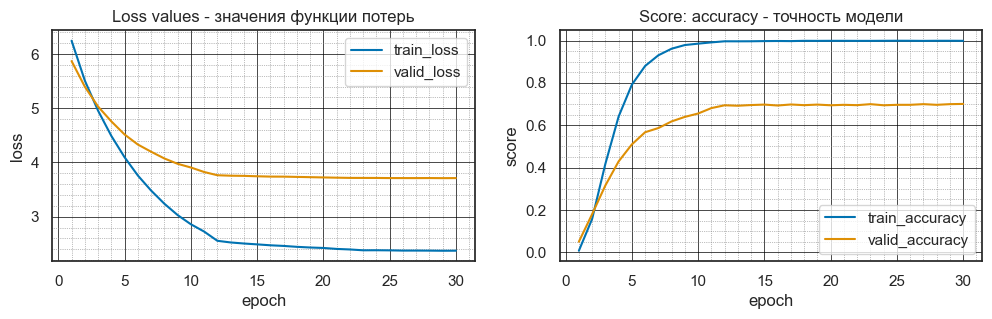

CPU times: total: 38min 6s
Wall time: 8min 20s


In [77]:
%%time

# загрузка данных
loaders = {'train': train_loader, 'valid': val_loader}

# словарь для хранения результатов
result = {'epoch': [], 'train_loss': [], 'valid_loss': [], 'train_accuracy': [], 'valid_accuracy': [] }

# количество эпох обучения
epochs = 30

# Обучение модели
train(model_arc, optimizer, scheduler, criterion, epochs, loaders, 'resnet18_arc', 'yes')

<div style='border: 3px solid #67a0f549; padding: 20px'>
    
**5. Оценка модели на тестовом наборе. Получение вложений и меток для визуализации**

In [78]:
# оценка модели и вывод результатов
test_accuracy_arc, test_loss = evaluate(model_arc, test_loader, criterion, 'yes')
print(f'test loss: {test_loss: 10.4f}, test accuracy: {test_accuracy_arc: 10.4f}')

# получение встроенных представлений и меток классов для анализа
labels_list_arc, emb_list_arc = get_embeddings(model_arc, test_loader, 'yes')
df_arc = pd.DataFrame(result)[['epoch', 'valid_accuracy']]

test loss:     3.6808, test accuracy:     0.7199


###  Подытог

<div style='border: 3px solid #1f69b4; padding: 20px'>

Результаты модели с применением **ArcFace Loss**:
    
- модель: train(model_arc, optimizer, scheduler, criterion, epochs, loaders, 'resnet18_arc', 'yes')
- epoch training: 30, lr optimizer: 1e-06, loss value validate:     3.7122, accuracy validate:     0.7007
- test loss:     3.6808, test accuracy:     0.7199

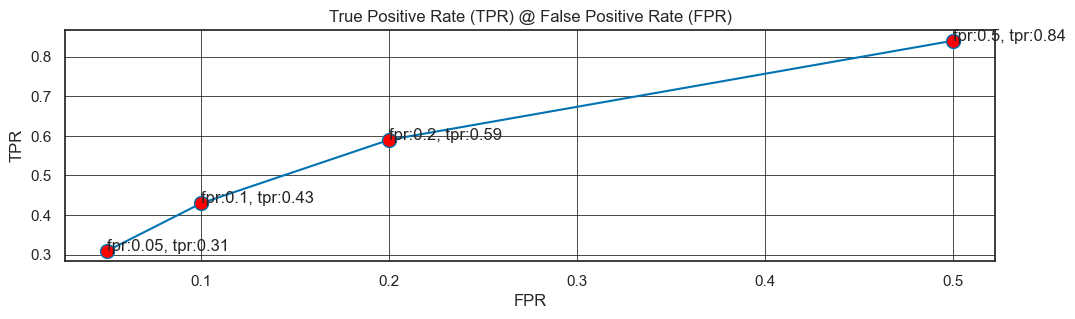

In [79]:
# рассчет TPR и FPR для модели ArcFace
fpr_arc, tpr_arc = TPR_FPR(model_arc)
show_TPR_FPR(fpr_arc, tpr_arc)

<div style='border: 3px solid #67a0f549; padding: 20px'>
    
**6. Визуализация вложений с использованием t-SNE**

Дополнительно посмотрим, как распределены в пространстве классы для дефолтной модели и для модели с использованием ArcFace. Возьмем для примера 30 рандомных классов.

In [80]:
# выбор случайных персонажей для визуализации
random_character = np.random.randint(0, 500, 30)
emb_elem_sm, labels_elem_sm, emb_elem_arc, labels_elem_arc = [],[],[],[]

for k in random_character:
    # извлечение встроенных представлений и меток для модели Softmax
    index = np.where(labels_list_sm == k)
    emb_elem_sm.extend(emb_list_sm[index])
    labels_elem_sm.extend(labels_list_sm[index])

    # извлечение встроенных представлений и меток для модели ArcFace
    index = np.where(labels_list_arc == k)
    emb_elem_arc.extend(emb_list_arc[index])
    labels_elem_arc.extend(labels_list_arc[index])

In [81]:
# Преобразование встроенных представлений с помощью TSNE для визуализации
emb_elem_sm = np.array(emb_elem_sm)
emb_elem_arc = np.array(emb_elem_arc)

emb_sm = TSNE(n_components = 2).fit_transform(emb_elem_sm)
emb_arc = TSNE(n_components = 2).fit_transform(emb_elem_arc)

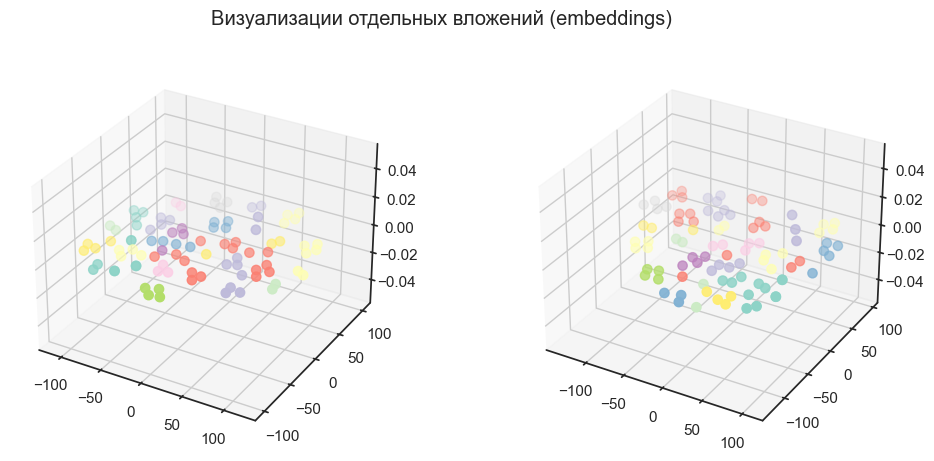

In [82]:
# визуализация встроенных представлений
_, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5), subplot_kw = {'projection': '3d'})
ax1.scatter(emb_sm[:, 0], emb_sm[:, 1], c = labels_elem_sm, cmap = 'Set3', marker = 'o', s = 45)
ax2.scatter(emb_arc[:, 0], emb_arc[:, 1], c = labels_elem_arc, cmap = 'Set3', marker = 'o', s = 45)
plt.suptitle('Визуализации отдельных вложений (embeddings)')
plt.show()

### Подытог

<div style='border: 3px solid #1f69b4; padding: 20px'>
    

На первом изображении векторные представления грубо разделены, и существует неопределенность относительно местоположения границ решений. Это означает, что сложно определить, где точно находятся границы между лицами, которые визуально похожи. В случае использования метода ArcFace (изображение 2), эмбеддинги не обладают этим недостатком, и результат кажется гораздо более качественным. Все точки расположены ближе друг к другу, и между представителями одного и того же класса наблюдается четкое различие. Обеспечивается компактность внутри классов и разделение между классами.

# Сведение результатов разных методов

<div style='border: 3px solid #67a0f549; padding: 20px'>
    
**Визуализация результатов точности моделей на валидации**

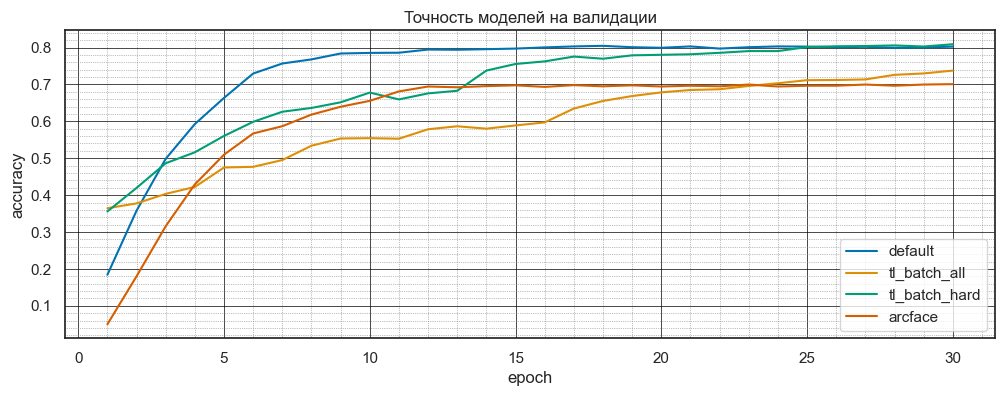

In [83]:
# визуализация точности на валидации для всех моделей
plt.figure(figsize = (12, 4))
plt.title('Точность моделей на валидации')
plt.xlabel('epoch')
plt.ylabel('accuracy')
sns.lineplot(x = df_default['epoch'], y = df_default['valid_accuracy'], label = 'default')
sns.lineplot(x = df_tl_batch_all['epoch'], y = df_tl_batch_all['valid_accuracy'], label = 'tl_batch_all')
sns.lineplot(x = df_tl_batch_hard['epoch'], y = df_tl_batch_hard['valid_accuracy'], label = 'tl_batch_hard')
sns.lineplot(x = df_arc['epoch'], y = df_arc['valid_accuracy'], label = 'arcface')
plt.legend()
plt.grid(True)
plt.minorticks_on()
plt.grid(which = 'major', linestyle = '-', linewidth = '0.5', color = 'black')
plt.grid(which = 'minor', linestyle = ':', linewidth = '0.5', color = 'grey')
plt.show()

<div style='border: 3px solid #67a0f549; padding: 20px'>
    
**Визуализация результатов точности моделей на тестовом загрузчике данных: accuracy test_loader**

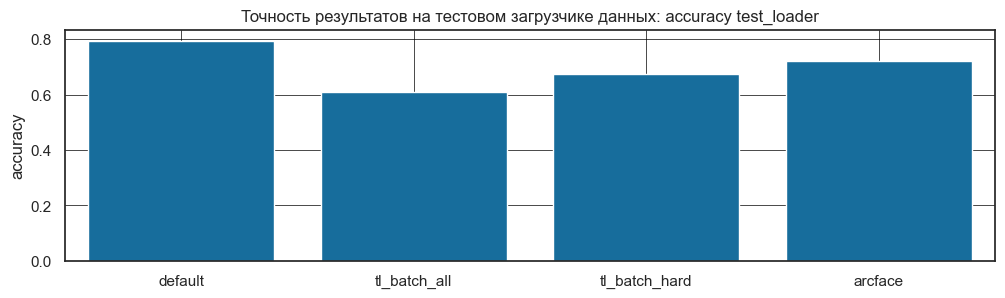

In [84]:
labels = ['default', 'tl_batch_all', 'tl_batch_hard', 'arcface']
values = [test_accuracy, test_accuracy_tl_batch_all, test_accuracy_tl_batch_hard, test_accuracy_arc]

plt.figure(figsize = (12, 3))
sns.barplot(x = labels, y = values)
plt.ylabel('accuracy')
plt.title('Точность результатов на тестовом загрузчике данных: accuracy test_loader')
plt.grid(True)
plt.minorticks_on()
plt.grid(which = 'major', linestyle = '-', linewidth = '0.5', color = 'black')
plt.show()

<div style='border: 3px solid #67a0f549; padding: 20px'>
    
**Визуализация результатов метрики True Positive Rate (TPR) @ False Positive Rate (FPR) для всех моделей**

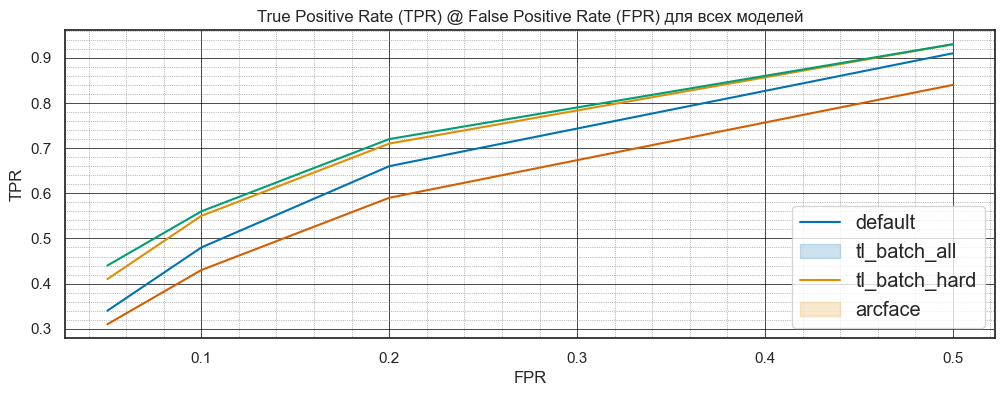

In [85]:
# график TPR@FPR для всех моделей
plt.figure(figsize = (12, 4))
plt.title('True Positive Rate (TPR) @ False Positive Rate (FPR) для всех моделей')
plt.xlabel('FPR')
plt.ylabel('TPR')
sns.lineplot(x = fpr_list, y = tpr_list)
sns.lineplot(x = fpr_list, y = tpr_tl_ba)
sns.lineplot(x = fpr_list, y = tpr_tl_bh)
sns.lineplot(x = fpr_list, y = tpr_arc)
plt.legend(['default', 'tl_batch_all', 'tl_batch_hard', 'arcface'], loc = 'lower right', fontsize = 'large')
plt.grid(True)
plt.minorticks_on()
plt.grid(which = 'major', linestyle = '-', linewidth = '0.5', color = 'black')
plt.grid(which = 'minor', linestyle = ':', linewidth = '0.5', color = 'grey')
plt.show()

# Краткий обзор проделанной работы

<div style='border:solid green 5px; padding: 20px'>

    
В данной работе представлена реализация метрики идентификации для задачи классификации изображений. Использованы эмбеддинги изображений для тренировочного и тестового наборов данных. Вычислены косинусная близость для всех пар уникальных классов. Построены графики распределения косинусной схожести для уникальных и неуникальных пар изображений. Вычислены уровень идентификации для заданных уровней ложных срабатываний (False Positive Rate, FPR). Обучены две модели для трансферного обучения (Transfer Learning) с использованием предварительно обученной модели ResNet-50. Обучение производитлось на наборе данных, состоящем из тренировочных, валидационных и тестовых подвыборок.
    
  
Рассмотрены различные этапы работы над проектом по распознаванию лиц:
1. Подготовка данных, включая чтение данных, нормализацию и аугментацию.
  
2. Обучение нейросети для распознавания лиц с использованием предобученной модели ResNet50.
    
3. Оценка модели на тестовом наборе данных и получение эмбеддингов изображений.
    
4. Анализ эмбеддингов, включая визуализацию и сравнение пар изображений.
    
5. Реализация метрики Identification Rate для оценки качества модели.
    
6. Использование различных функций потерь (TripletLoss, ArcFace Loss) и сравнение их эффективности. В работе использовались предварительно обученные модели ResNet50 и ResNet18, а также различные библиотеки для обработки изображений и работы с нейронными сетями.
    
    
**ВЫВОДЫ ПО РАБОТЕ:**
    
Результаты обучения стандартной предобученной модели
- модель: train(model, optimizer, scheduler, criterion, epochs, loaders, 'resnet50_sm')
- epoch training: 30, lr optimizer: 1e-06, loss value validate:     1.3463, accuracy validate:     0.8024

Точность модели на валидации растет примерно до 11-12 эпохи достигая значения 0.8 после чего перестает расти.
    
Фунция потерь также перестает падать после 11-12 эпохи достигая значения 1.4 на валидации

С применением предобученной модели Resnet50 значения точности нашей модели составляет 0.7948, что является выше порогового значения по условиям задачи равного 0.7.

Глядя на результаты определения косинусной схожести (**cosine_min и cosine_max**) людей на разнаых фотографиях очевидно, что модель правильно относит к похожим и не похожим персонажам

1) Для неуникальных пар изображений характер распределения значений косинусной схожести обретает нормальный вид. Среднее и медиана почти равны и составляет около 0.715
    
2) Для уникальных пар распределение смещено вправо. Среднее значение 0.875 меньше медианы 0.89

При FPR равному 0.5 значение TRP составляет 0.91

Результаты обучения модели с **batch_all_triplet_loss:**
- модель: train2(model_TL, optimizer, scheduler, epochs, loaders, 'batch_all_triplet_loss', 0.4, 'resnet_50_tl_batch_all')
- epoch training: 30, lr optimizer: 1e-05, loss value validate:     0.5227, accuracy validate:     0.7375
- test loss:     0.5153, test accuracy:     0.6111

Результаты обучения модели с **batch_hard_triplet_loss:**
- модель: train2(model_TL_bh, optimizer, scheduler, epochs, loaders, 'batch_hard_triplet_loss', 1, 'resnet_50_tl_batch_hard')
- epoch training: 30, lr optimizer: 1e-06, loss value validate:     1.1090, accuracy validate:     0.8089
- test loss:     1.0710, test accuracy:     0.6728

Результаты модели с применением **ArcFace Loss**:
    
- модель: train(model_arc, optimizer, scheduler, criterion, epochs, loaders, 'resnet18_arc', 'yes')
- epoch training: 30, lr optimizer: 1e-06, loss value validate:     3.7122, accuracy validate:     0.7007
- test loss:     3.6808, test accuracy:     0.7199

На первом изображении "Визуализации отдельных вложений (embending)" векторные представления грубо разделены, и существует неопределенность относительно местоположения границ решений. Это означает, что сложно определить, где точно находятся границы между лицами, которые визуально похожи. В случае использования метода ArcFace (изображение 2), эмбеддинги не обладают этим недостатком, и результат кажется гораздо более качественным. Все точки расположены ближе друг к другу, и между представителями одного и того же класса наблюдается четкое различие. Обеспечивается компактность внутри классов и разделение между классами.    